## Deepak_P2P_Pipelining_Deployment_Final_Project

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import RandomOverSampler, SMOTE
from pprint import pprint
# import streamlit as st
from xgboost import XGBRegressor, XGBClassifier

## Import Data Into Dataframe

In [2]:
data =pd.read_csv("prosperLoanData.csv")
data.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

## Data Preprocessing

In [3]:
columns = pd.set_option('display.max_columns', None)
# Rows = pd.set_option('display.max_rows', None)
data

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516        0.1580       0.1380                      NaN   
1           0.12016        0.0920       0.0820                  0.07960   
2           0.28269        0.2750       0.2400                      NaN   
3           0.12528        0.0974       0.0874                  0.08490   
4           0.24614        0.2085       0.1985                  0.18316   
...             ...           ...          ...                      ...   
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0                 NaN              NaN                      NaN   
1              0.0249          0.05470                      6.0   
2                 NaN              NaN                      NaN   
3              0.0249          0.06000                      6.0   
4              0.0925          0.09066                      3.0   
...               ...              ...                      ...   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

       ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                        NaN           NaN                          0   
1                          A           7.0                          2   
2                        NaN           NaN                          0   
3                          A           9.0                         16   
4                          D           4.0                          2   
...                      ..

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Handling Missing Values

In [5]:
# Drop the column which having missing value greater than 70 percent
total_cells = data.shape[0]
drop_col=[]
for val in data:
    missing_values = data[val].isnull().sum()
    total_missing_percentage = (missing_values.sum()/total_cells)*100
    if total_missing_percentage >= 70 :
        drop_col.append(val)
        print(f'the missing values percent in Col {val} ----> {total_missing_percentage.round()} ')

print(drop_col)


the missing values percent in Col CreditGrade ----> 75.0 
the missing values percent in Col GroupKey ----> 88.0 
the missing values percent in Col TotalProsperLoans ----> 81.0 
the missing values percent in Col TotalProsperPaymentsBilled ----> 81.0 
the missing values percent in Col OnTimeProsperPayments ----> 81.0 
the missing values percent in Col ProsperPaymentsLessThanOneMonthLate ----> 81.0 
the missing values percent in Col ProsperPaymentsOneMonthPlusLate ----> 81.0 
the missing values percent in Col ProsperPrincipalBorrowed ----> 81.0 
the missing values percent in Col ProsperPrincipalOutstanding ----> 81.0 
the missing values percent in Col ScorexChangeAtTimeOfListing ----> 83.0 
the missing values percent in Col LoanFirstDefaultedCycleNumber ----> 85.0 
['CreditGrade', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOuts

## Data Cleaning

In [6]:
# copy the original data
data_copy = data.copy()
data_copy = data_copy.drop(columns =drop_col )

In [7]:
data_copy.shape
# LoanAccepted my target column in the dataset
data_copy['LoanAccepted'] = data_copy['LoanStatus'].apply(lambda x: 1 if x in ['Completed', 'Current'] else 0)

In [8]:
# categorical columns
cate_col = data_copy.select_dtypes(exclude = 'number').columns
cate_col

Index(['ListingKey', 'ListingCreationDate', 'LoanStatus', 'ClosedDate',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [9]:
# Calculate the percentage of missing values for each column
missing_values = data.isna().sum() / len(data)

# Find the columns with more than 75% missing values
columns_with_more_than_75_missing_values = missing_values[missing_values > 0.75].index

# Print the names of the columns with more than 75% missing values
print(columns_with_more_than_75_missing_values)

Index(['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')


In [10]:
# drop rows having missing values
columns_to_drop = ['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']
data_copy.dropna( subset=columns_to_drop, inplace=True)

In [11]:
# showing null columns
data_copy.isna().sum()


ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
LoanAccepted                   0
Length: 71, dtype: int64

<Axes: xlabel='count', ylabel='Occupation'>

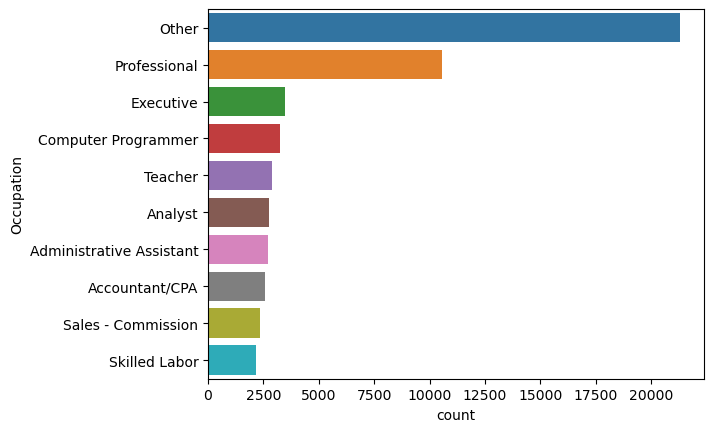

In [12]:
# show the largest 10 values in Occupation column

top_10_occupations = data_copy['Occupation'].value_counts().nlargest(10).index
sns.countplot(data=data_copy , y='Occupation',order=top_10_occupations)

In [13]:
df1 = data_copy
# showing unique values present in occupation column
df1['Occupation'].unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', nan, 'Teacher', 'Clergy', 'Attorney', 'Nurse (RN)',
       'Accountant/CPA', 'Analyst', 'Investor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Truck Driver',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Religious',
     

## Data Encoding

In [14]:
# Define the binary encoding function based on the condition of 
# the "LoanCurrentDaysDelinquent" variable:
def encode_loan_status(row):
    if row["LoanCurrentDaysDelinquent"] > 0:
        return "Delinquent"
    else:
        return "Non-Delinquent"


In [15]:
# Apply the binary encoding function to create a new column 
# for the encoded "LoanStatus":
df1["EncodedLoanStatus"] = df1.apply(encode_loan_status, axis=1)

# Encode the "EncodedLoanStatus" column using binary encoding:
binary_encoder = ce.BinaryEncoder(cols=["EncodedLoanStatus"])
data_encoded = binary_encoder.fit_transform(df1)



In [16]:
# Optional: Drop the original "LoanStatus" and "LoanCurrentDaysDelinquent" 
# columns if needed:
data_encoded = data_encoded.drop(["LoanStatus", "LoanCurrentDaysDelinquent"], axis=1)

# View the resulting encoded dataset:
print(data_encoded.head())


                ListingKey  ListingNumber            ListingCreationDate  \
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   

   Term ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
1    36        NaN      0.12016        0.0920       0.0820   
3    36        NaN      0.12528        0.0974       0.0874   
4    36        NaN      0.24614        0.2085       0.1985   
5    60        NaN      0.15425        0.1314       0.1214   
6    36        NaN      0.31032        0.2712       0.2612   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1                  0.07960         0.0249          0.05470   
3                  0.08490         0.0249     

In [17]:
# Create a new column called "LoanStatus"
df1["LoanStatus"] = df1["LoanCurrentDaysDelinquent"] > 180
df1["LoanStatus"] = df1["LoanStatus"].replace({True: 0, False: 1})
# Print the first few rows of the dataset
df1.head()

ListingKey  ListingNumber            ListingCreationDate  \
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   

   Term  LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
1    36           1        NaN      0.12016        0.0920       0.0820   
3    36           1        NaN      0.12528        0.0974       0.0874   
4    36           1        NaN      0.24614        0.2085       0.1985   
5    60           1        NaN      0.15425        0.1314       0.1214   
6    36           1        NaN      0.31032        0.2712       0.2612   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1                  0.07960         0.0249          0.05470   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   
5                  0.11567         0.0449          0.07077   
6                  0.23820         0.1275          0.11070   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
1                      6.0                     A           7.0   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   
5                      5.0                     B          10.0   
6                      2.0                     E           2.0   

   ListingCategory (numeric) BorrowerState      Occupation EmploymentStatus  \
1                          2            CO    Professional         Employed   
3                         16            GA   Skilled Labor         Employed   
4                          2            MN       Executive         Employed   
5                          1            NM    Professional         Employed   
6                          1            KS  Sales - Retail         Employed   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
1                      44.0                False             False   
3                     113.0                 True             False   
4                      44.0                 True             False   
5                      82.0                 True             False   
6                     172.0                False             False   

      DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
1  2014-02-27 08:28:14                  680.0                  699.0   
3  2012-10-22 11:02:32                  800.0                  819.0   
4  2013-09-14 18:38:44                  680.0                  699.0   
5  2013-12-14 08:26:40                  740.0                  759.0   
6  2013-04-12 09:52:53                  680.0                  699.0   

  FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
1     1996-03-18 00:00:00                14.0             14.0   
3     1983-02-28 00:00:00                 5.0              5.0   
4     2004-02-20 00:00:00                19.0             19.0   
5     1973-03-01 00:00:00                21.0             17.0   
6     2000-09-29 00:00:00                10.0              7.0   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
1                        29.0                     13   
3                        29.0                      7   
4                        49.0                      6   
5                        49.0                     13   
6                        20.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
1                        389.0                   3.0             5.0   
3                        115.0                   0.0             1.0   
4                        220.0                   1.0             

In [18]:
# unique values
df1["LoanStatus"].unique()

array([1, 0], dtype=int64)

In [19]:
# fill null values 
df1['ProsperRating (numeric)']=df1['ProsperRating (numeric)'].fillna(df1['ProsperRating (numeric)'].dropna().mean())
df1['ProsperScore'] =df1['ProsperScore'].fillna(df1['ProsperScore'].dropna().mean())
# df1["CreditGrade"] = df1["CreditGrade"].fillna(df1["CreditGrade"].mode()[0])
df1["ProsperRating (Alpha)"] = df1["ProsperRating (Alpha)"].fillna(df1["ProsperRating (Alpha)"].mode()[0])


In [20]:
df1 =df1.fillna(0)
df1

ListingKey  ListingNumber            ListingCreationDate  \
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

        Term  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
1         36           1                    0      0.12016        0.0920   
3         36           1                    0      0.12528        0.0974   
4         36           1                    0      0.24614        0.2085   
5         60           1                    0      0.15425        0.1314   
6         36           1                    0      0.31032        0.2712   
...      ...         ...                  ...          ...           ...   
113932    36           1                    0      0.22354        0.1864   
113933    36           1                    0      0.13220        0.1110   
113934    60           1                    0      0.23984        0.2150   
113935    60           1  2013-08-13 00:00:00      0.28408        0.2605   
113936    36           1                    0      0.13189        0.1039   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1            0.0820                  0.07960         0.0249          0.05470   
3            0.0874                  0.08490         0.0249          0.06000   
4            0.1985                  0.18316         0.0925          0.09066   
5            0.1214                  0.11567         0.0449          0.07077   
6            0.2612                  0.23820         0.1275          0.11070   
...             ...                      ...            ...              ...   
113932       0.1764                  0.16490         0.0699          0.09500   
113933       0.1010                  0.10070         0.0200          0.08070   
113934       0.2050                  0.18828         0.1025          0.08578   
113935       0.2505                  0.24450         0.0850          0.15950   
113936       0.0939                  0.09071         0.0299          0.06081   

        ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
1                           6.0                     A           7.0   
3                           6.0                     A           9.0   
4                           3.0                     D           4.0   
5                           5.0                     B          10.0   
6                           2.0                     E           2.0   
...                         ...                   ...           ...   
113932                      4.0                     C           5.0   
113933                      6.0                     A           8.0   
113934                      3.0                     D           3.0   
113935                      4.0                     C           5.0   
113936                      6.0                     A           7.0   

        ListingCategory (numeric) BorrowerState               Occupation  \
1                               2            CO             Professional   
3                              16            GA            Skilled Labor   
4                               2            MN                Executive   
5                

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform the labels
df1['IncomeVerifiable'] = label_encoder.fit_transform(df1['IncomeVerifiable'])
df1['CurrentlyInGroup'] = label_encoder.fit_transform(df1['CurrentlyInGroup'])
df1['IsBorrowerHomeowner'] = label_encoder.fit_transform(df1['IsBorrowerHomeowner'])
# df1["CreditGrade"] = df1["CreditGrade"].fillna(df1["CreditGrade"].mode()[0])

df1

ListingKey  ListingNumber            ListingCreationDate  \
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

        Term  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
1         36           1                    0      0.12016        0.0920   
3         36           1                    0      0.12528        0.0974   
4         36           1                    0      0.24614        0.2085   
5         60           1                    0      0.15425        0.1314   
6         36           1                    0      0.31032        0.2712   
...      ...         ...                  ...          ...           ...   
113932    36           1                    0      0.22354        0.1864   
113933    36           1                    0      0.13220        0.1110   
113934    60           1                    0      0.23984        0.2150   
113935    60           1  2013-08-13 00:00:00      0.28408        0.2605   
113936    36           1                    0      0.13189        0.1039   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1            0.0820                  0.07960         0.0249          0.05470   
3            0.0874                  0.08490         0.0249          0.06000   
4            0.1985                  0.18316         0.0925          0.09066   
5            0.1214                  0.11567         0.0449          0.07077   
6            0.2612                  0.23820         0.1275          0.11070   
...             ...                      ...            ...              ...   
113932       0.1764                  0.16490         0.0699          0.09500   
113933       0.1010                  0.10070         0.0200          0.08070   
113934       0.2050                  0.18828         0.1025          0.08578   
113935       0.2505                  0.24450         0.0850          0.15950   
113936       0.0939                  0.09071         0.0299          0.06081   

        ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
1                           6.0                     A           7.0   
3                           6.0                     A           9.0   
4                           3.0                     D           4.0   
5                           5.0                     B          10.0   
6                           2.0                     E           2.0   
...                         ...                   ...           ...   
113932                      4.0                     C           5.0   
113933                      6.0                     A           8.0   
113934                      3.0                     D           3.0   
113935                      4.0                     C           5.0   
113936                      6.0                     A           7.0   

        ListingCategory (numeric) BorrowerState               Occupation  \
1                               2            CO             Professional   
3                              16            GA            Skilled Labor   
4                               2            MN                Executive   
5                

In [22]:
# replace categorical values with binary
# df1['IncomeRange'].replace('Not displayed', $0, inplace=True)
df1['IncomeRange'].replace('Not employed', '$0', inplace=True)
df1.head(50)

ListingKey  ListingNumber            ListingCreationDate  \
1   10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3   0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4   0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5   0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6   0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7   0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8   0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9   0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10  0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
12  0F1A3597143888805163EF7        1081604  2013-12-15 20:01:10.757000000   
13  0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14  0F353575943675863D1AFC0         757359  2013-04-19 11:17:41.700000000   
15  0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
16  0F4835843081468212F0892         841846  2013-07-16 12:42:48.680000000   
18  0FF2357105361877390B58D         716058  2013-02-20 03:48:37.470000000   
19  0FFC35866018516621B0D3F         875565  2013-08-21 06:49:02.093000000   
20  101635959323992333B3C70        1011916  2013-11-22 11:35:02.987000000   
22  101735700321773921526BF         706927  2013-01-30 09:36:13.783000000   
23  101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
24  101B3596709094692AC79C0        1046345  2013-12-03 11:34:46.127000000   
25  10223590888942486E3826E         950067  2013-10-02 14:31:09.157000000   
26  0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27  0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
28  0F53359346357513247D86B         989519  2013-11-02 16:01:28.050000000   
29  0F563597161095613517437        1051243  2013-12-17 09:18:33.220000000   
30  0F57353904771934596FE9F         555213  2012-01-30 17:59:17.200000000   
31  0F683558129866945165D36         643927  2012-09-21 13:37:43.210000000   
32  0F683599787642317AE85C5        1132356  2014-01-10 11:19:14.947000000   
33  0F6B3496936961316AEE1B2         478891  2010-10-10 13:23:30.757000000   
34  0F6C3603015887476F3F015        1180690  2014-02-24 12:55:20.430000000   
35  1092353380565801709A4A2         544093  2011-12-11 16:47:05.710000000   
36  1092359520343159157D1AC        1059633  2013-11-27 11:46:18.690000000   
37  10993590382481129382160         915698  2013-09-16 17:22:06.757000000   
38  109A35861259973172F6548         869272  2013-08-13 16:11:17.173000000   
40  10A43601079743929992413        1167746  2014-01-27 12:02:57.523000000   
41  10A635483653880905FC2D6         594297  2012-05-30 11:08:43.140000000   
43  10B93591610781064F9C46B         943697  2013-10-08 13:48:43.950000000   
44  0F823581900037042AC6A5E         816108  2013-06-20 09:48:03.017000000   
45  0F843574249889932A8662E         741867  2013-04-01 05:20:57.110000000   
47  0F8B3577039176552F6CC26         765126  2013-05-01 08:18:59.183000000   
48  0F923587782964897A58B1B         875992  2013-08-20 19:25:08.830000000   
49  0F9D3585166658459B9AC30         860928  2013-08-05 17:38:57.243000000   
50  0FA035965589061761C3D7A        1081059  2013-12-12 08:52:08.730000000   
51  0FA935298156996977CF764         536427  2011-10-30 17:25:09.443000000   
52  0FAA357428986754861A3E6         733454  2013-03-20 14:08:52.343000000   
53  0FA3356960850383539D362         706745  2013-02-01 12:40:21.387000000   
54  0FBC3556025226720BE6DD4         629058  2012-08-26 09:43:38.643000000   
55  0FC13592826344497AFB874         992574  2013-10-21 11:24:44.110000000   
56  0FD235896044348280704B9         894247  2013-09-16 04:38:51.517000000   
57  0FEA35330893790885F63E8         540655  2011-11-22 14:13:53.397000000   

    Term  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
1     36         

In [23]:
# df1.info()
df1['IncomeRange'].unique()
df1['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
$0                  694
Name: IncomeRange, dtype: int64

## Handling Outliers

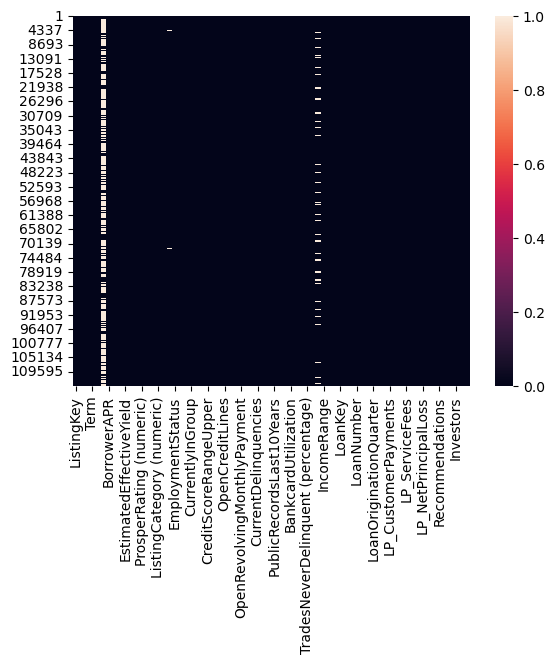

In [24]:
# showing heatmap for missing values
sns.heatmap(data_copy.isnull())
plt.show()

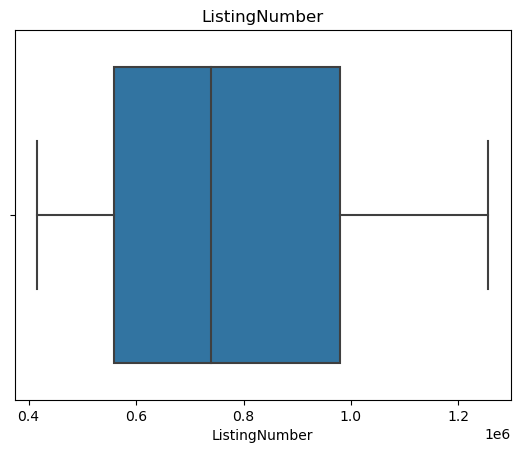

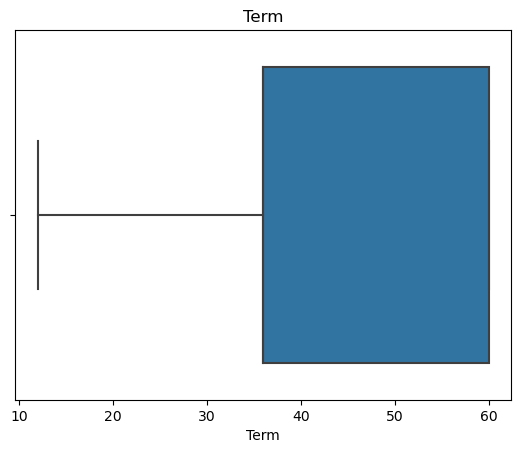

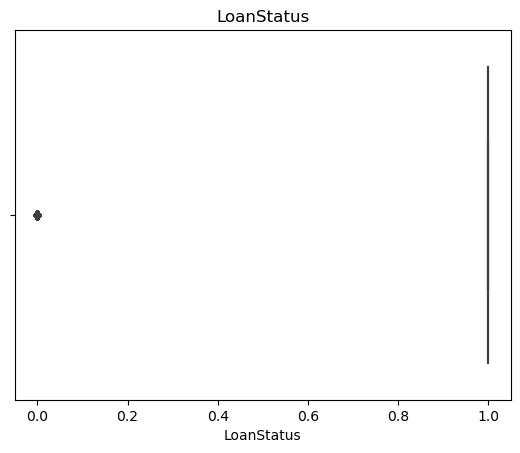

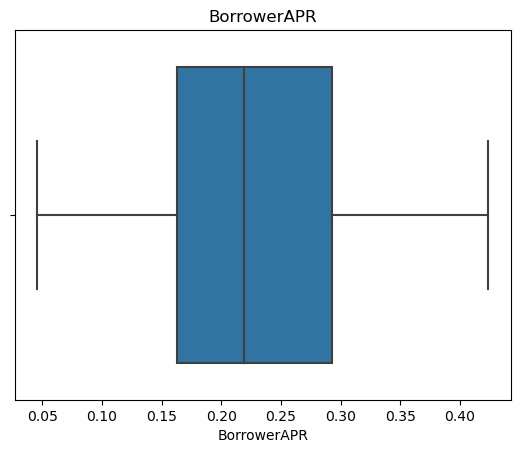

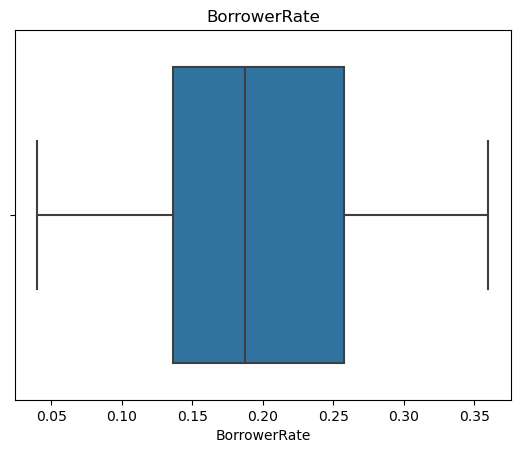

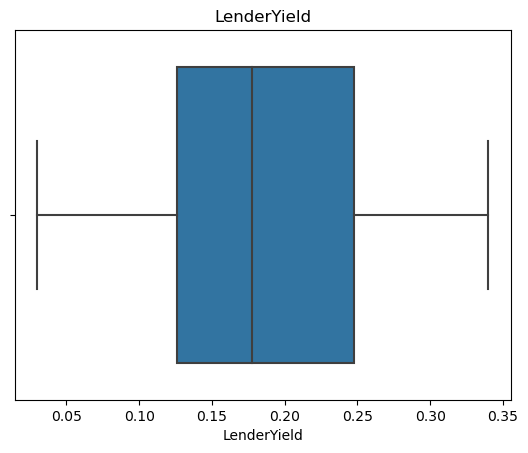

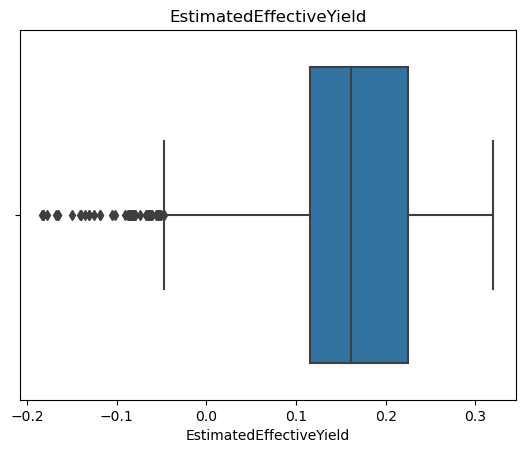

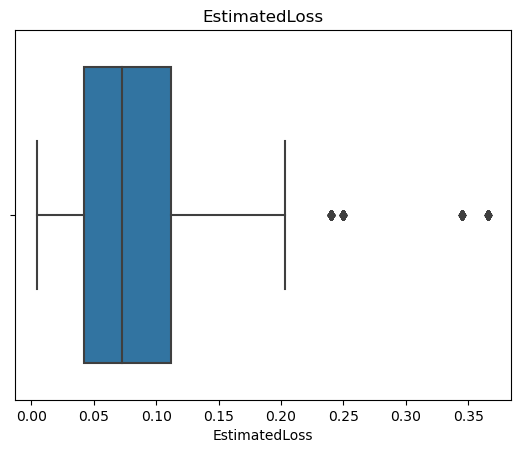

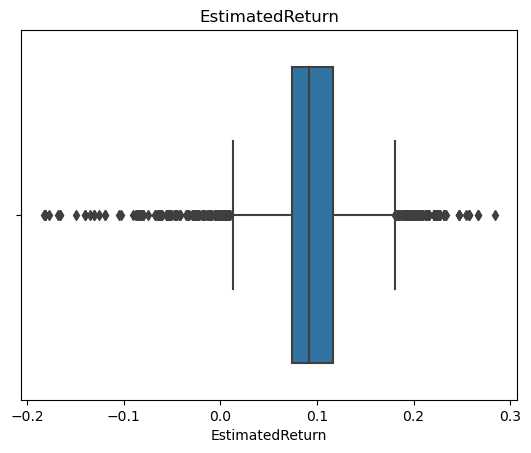

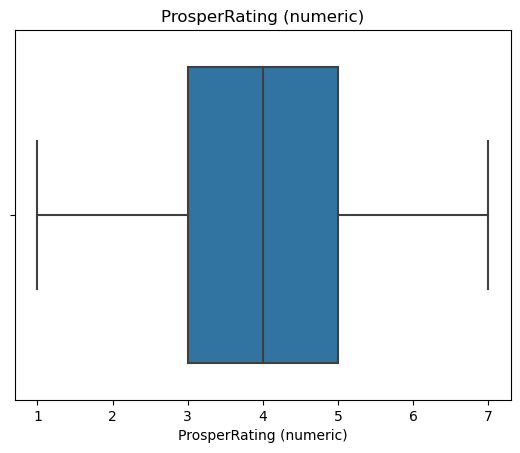

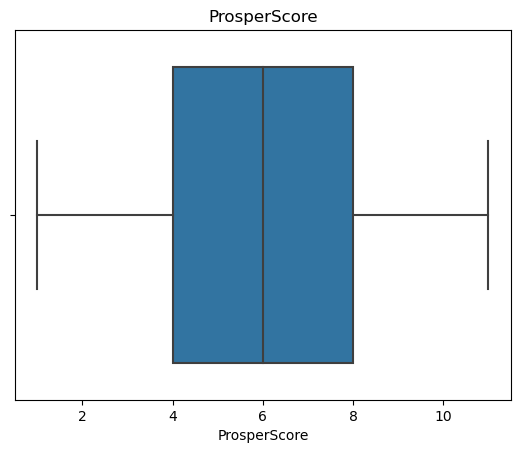

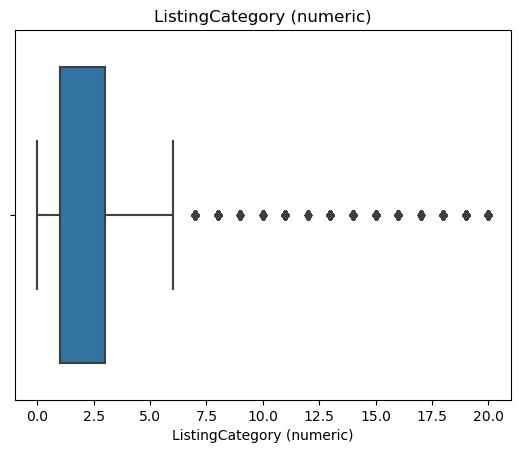

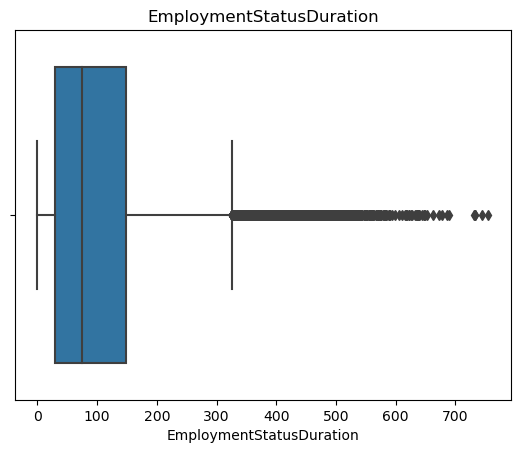

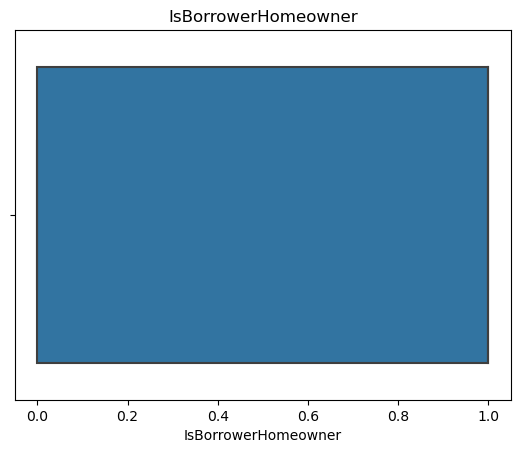

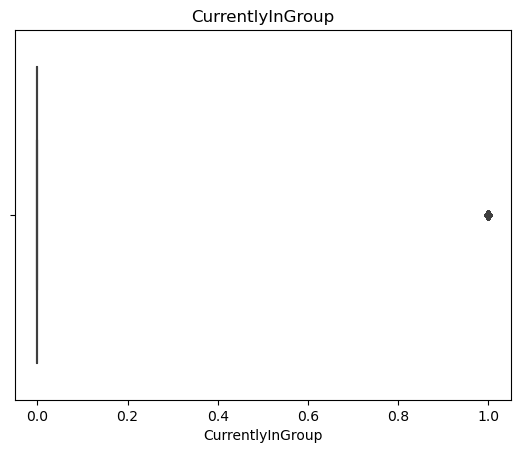

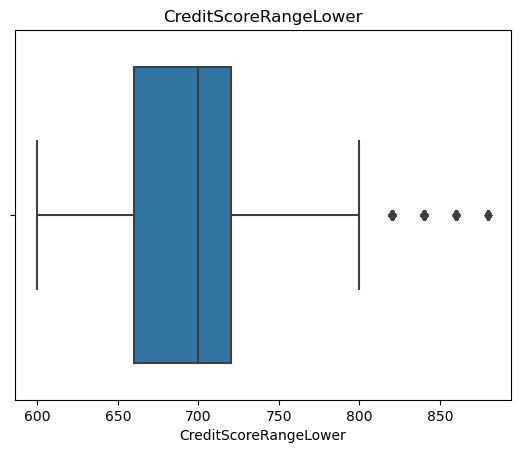

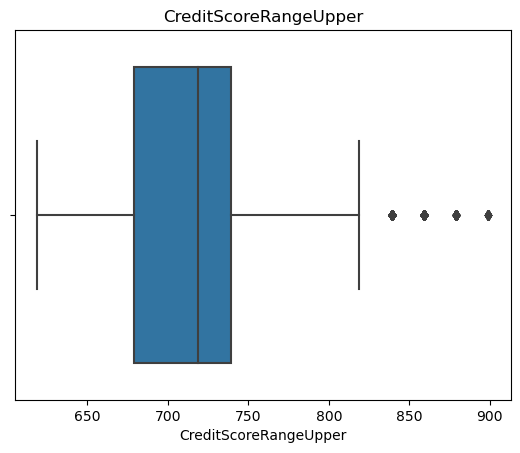

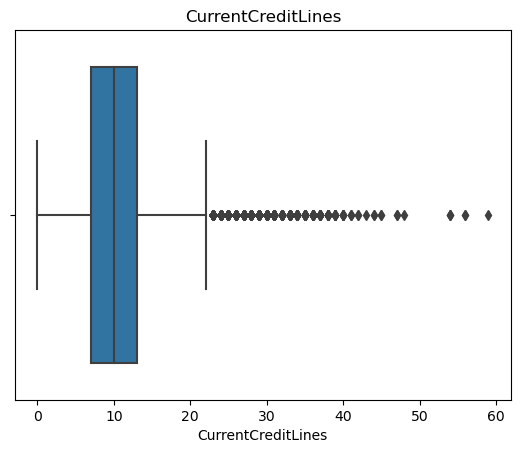

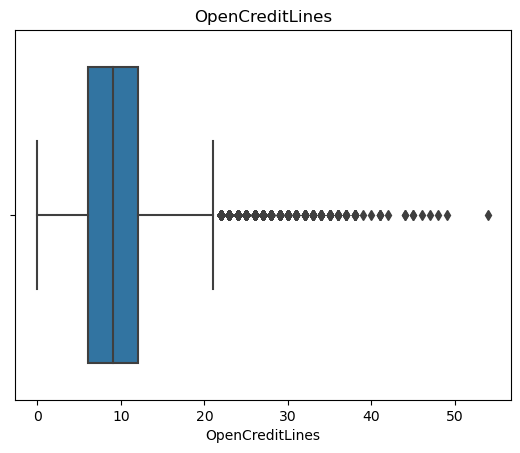

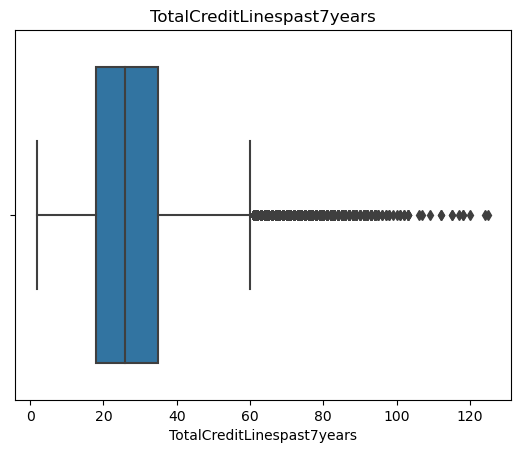

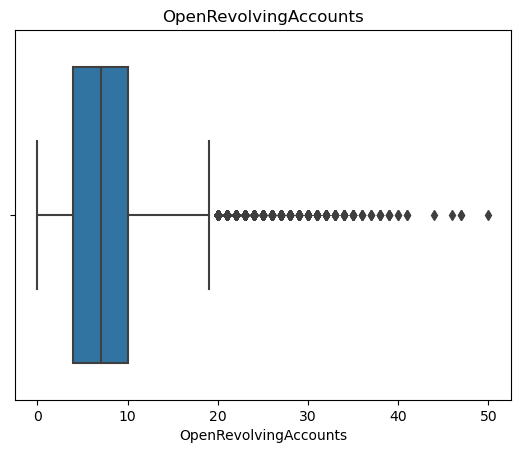

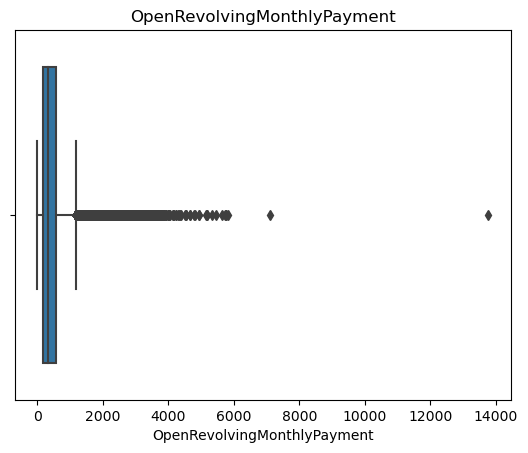

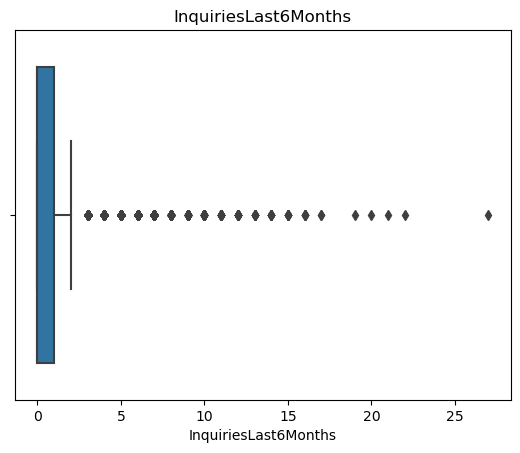

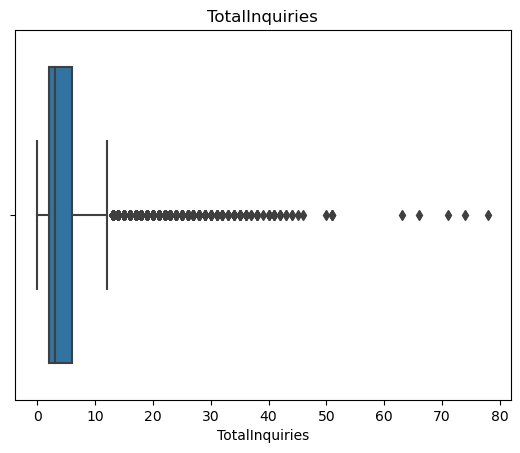

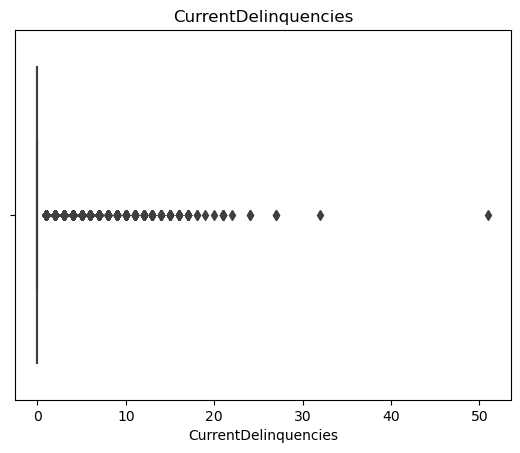

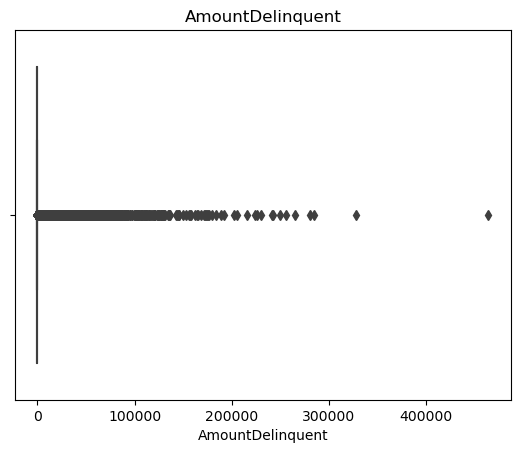

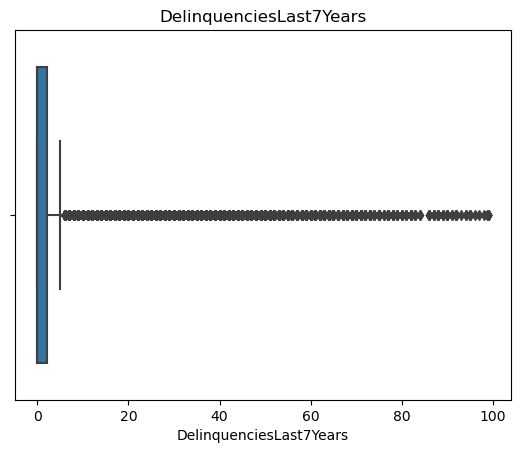

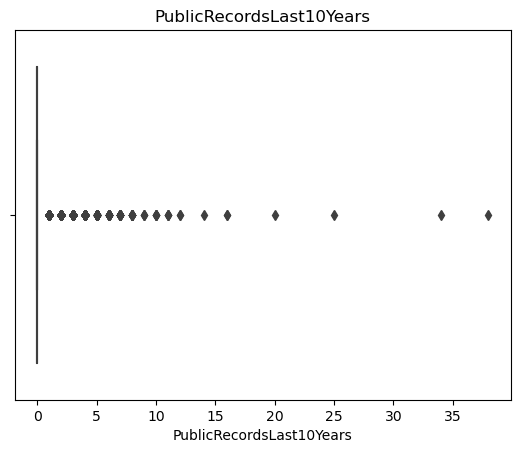

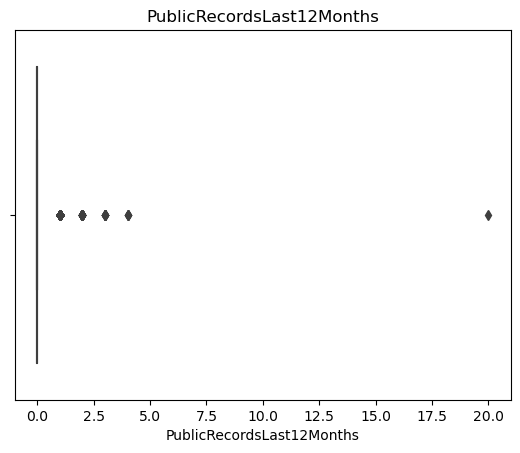

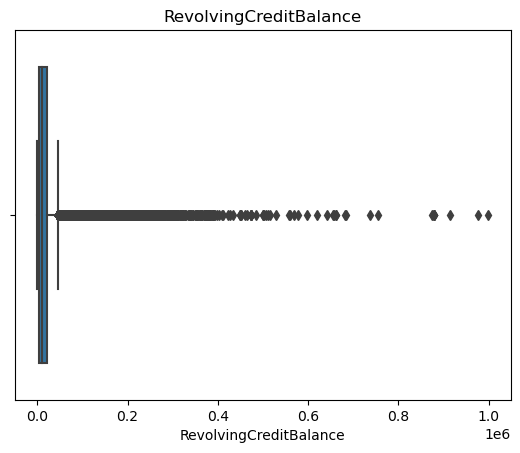

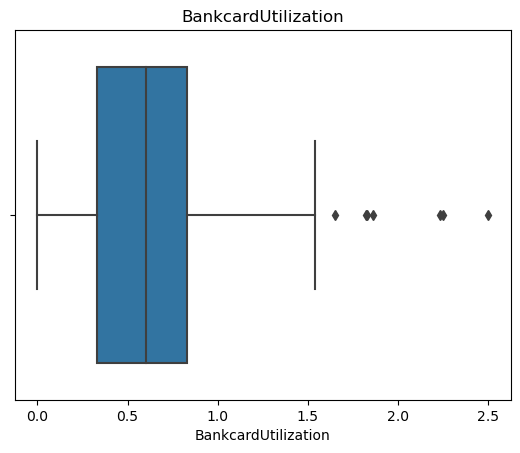

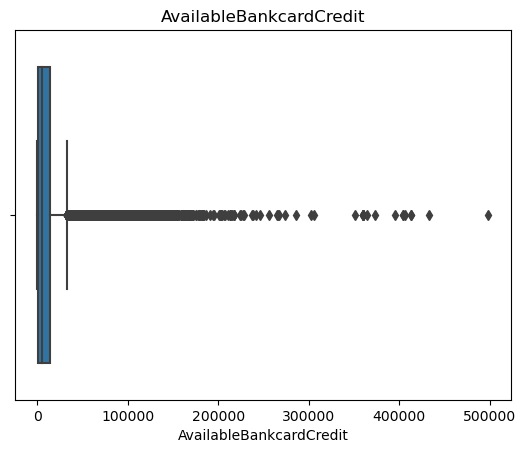

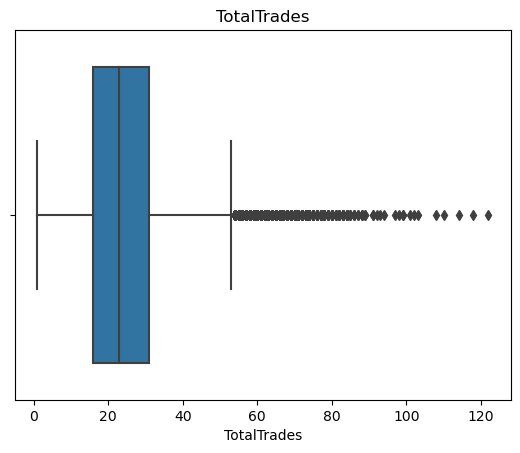

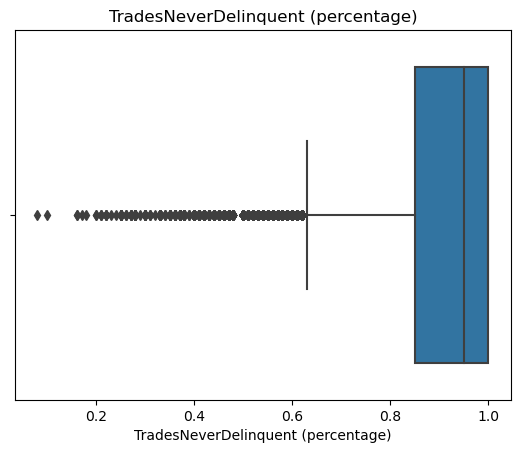

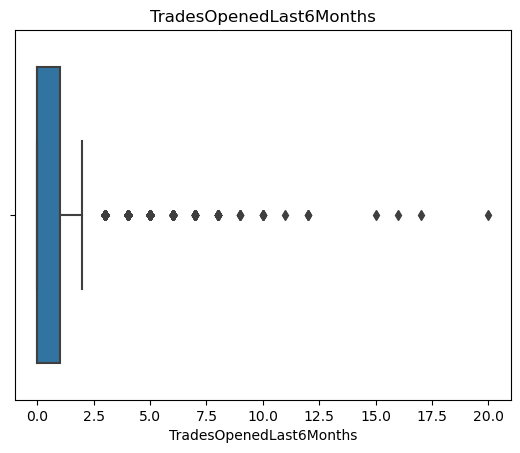

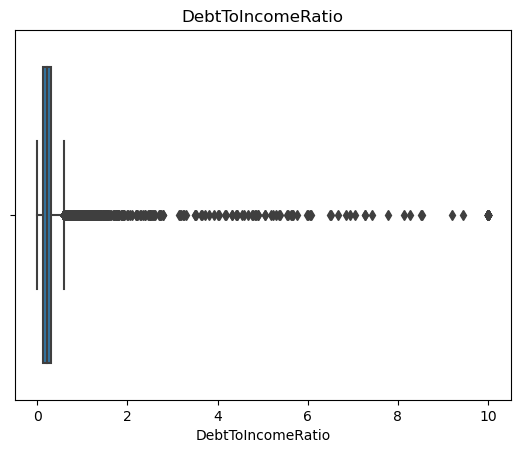

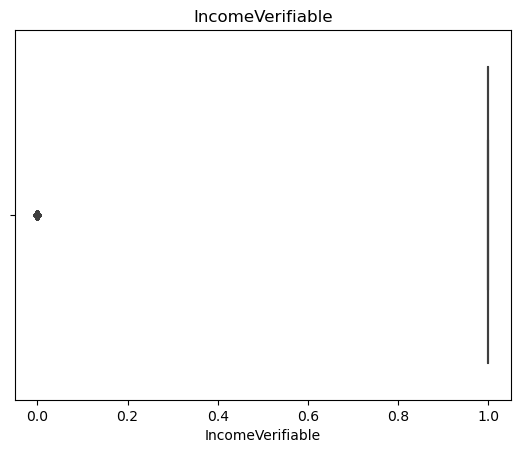

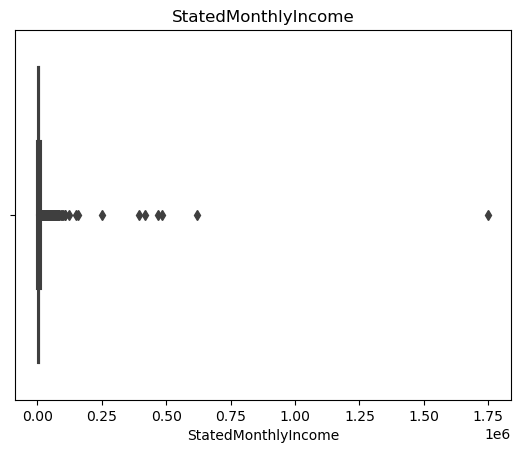

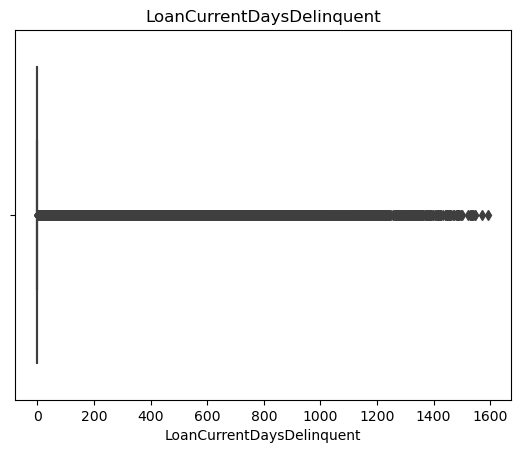

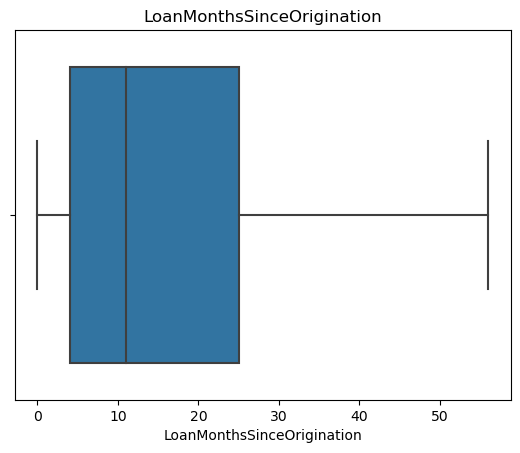

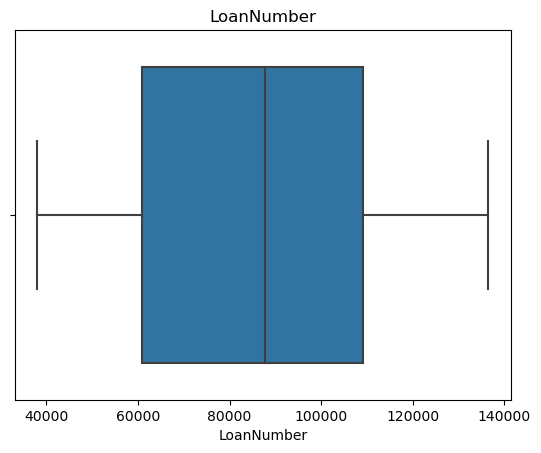

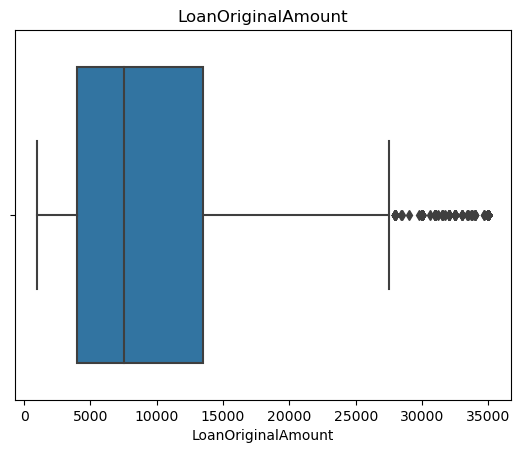

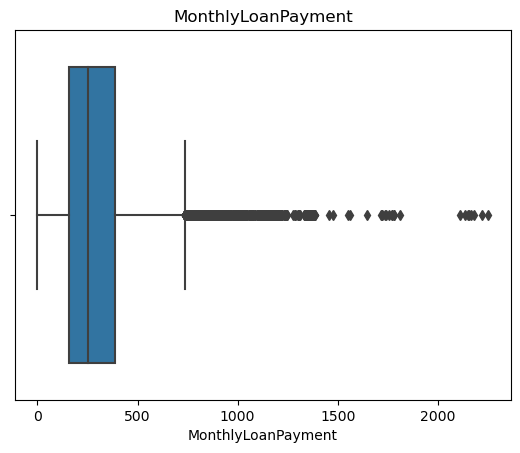

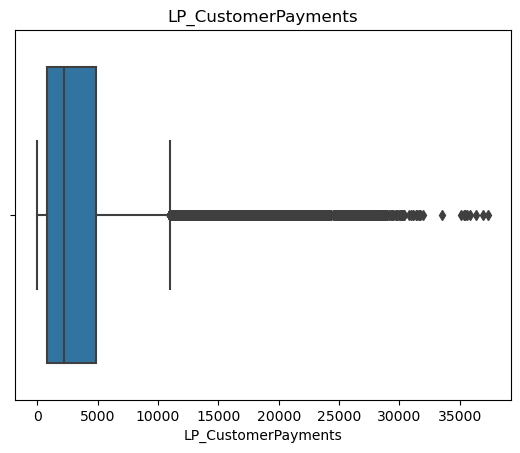

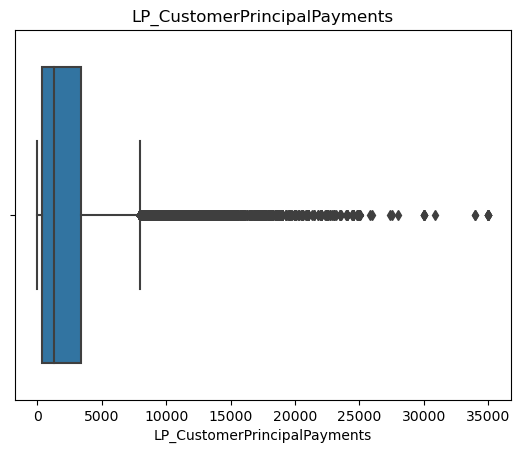

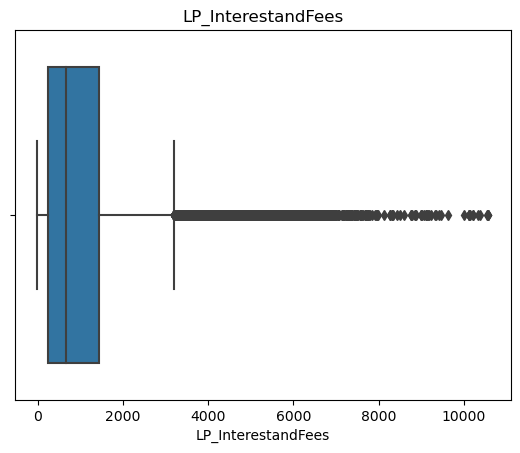

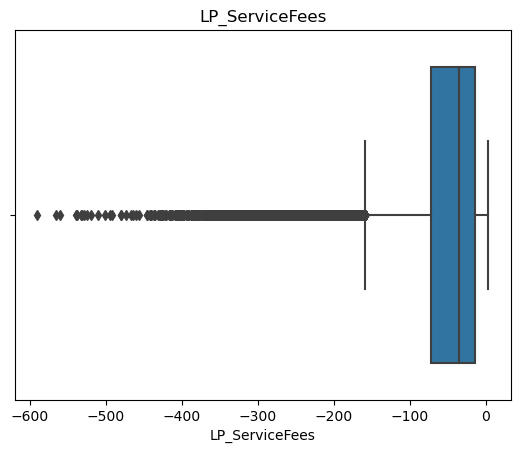

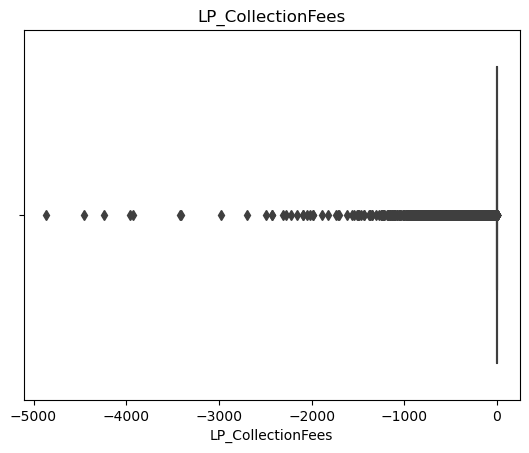

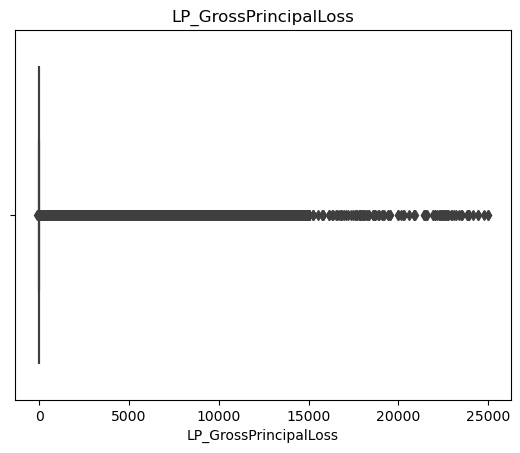

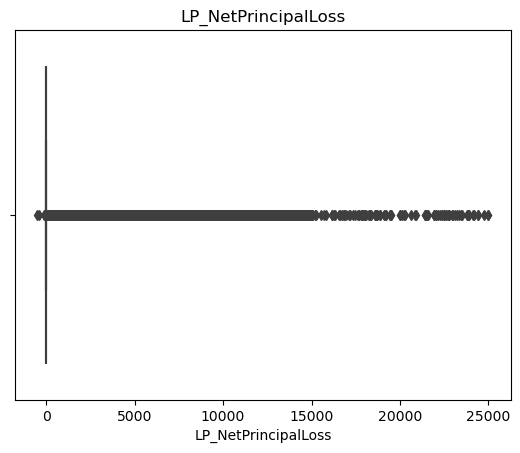

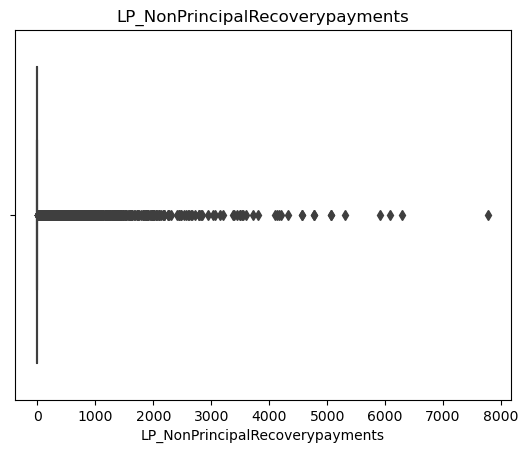

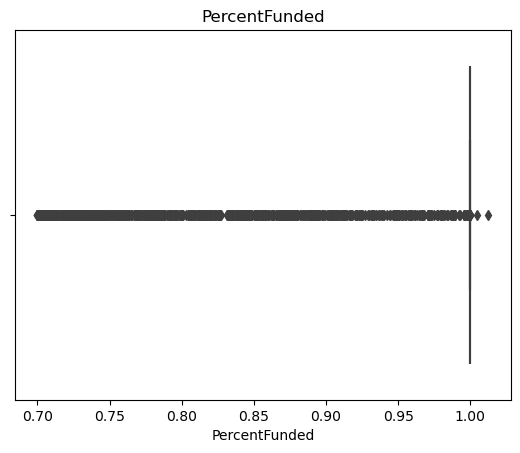

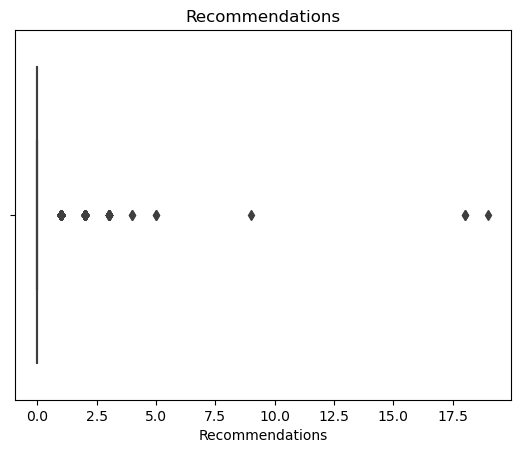

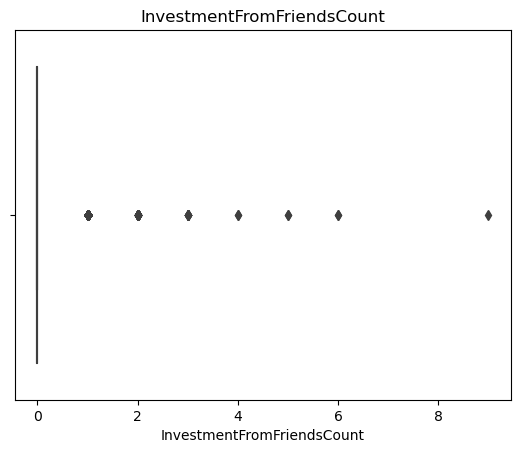

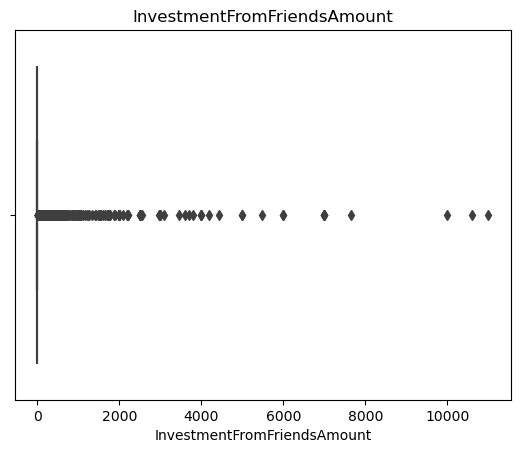

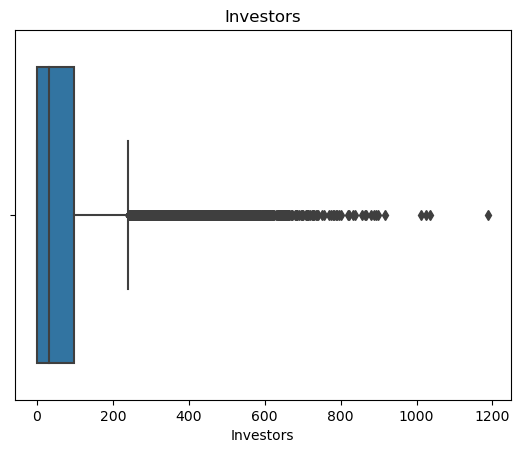

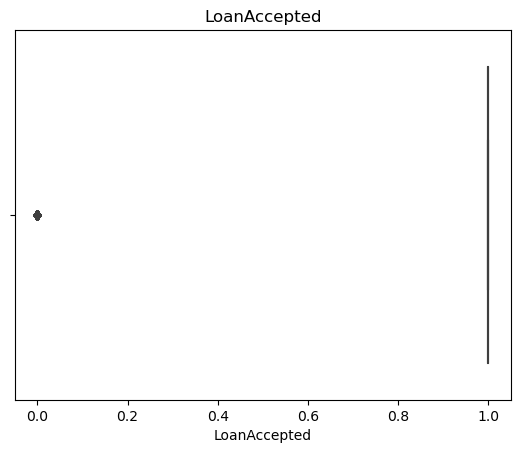

In [25]:
# showing boxplot of numerical columns
numeric_col = df1.select_dtypes(include=np.number).columns
for column in numeric_col:
    sns.boxplot(x=df1[column])
    plt.title(column)
    plt.show()

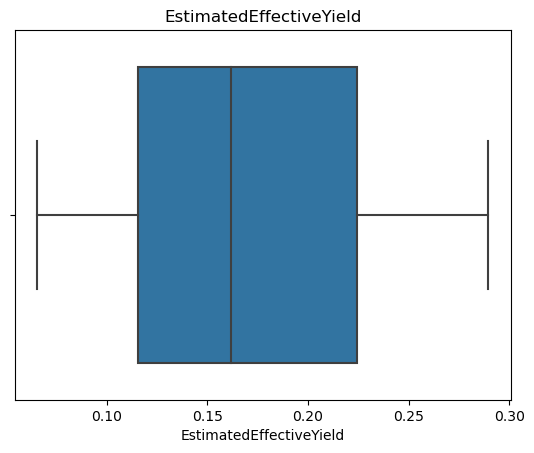

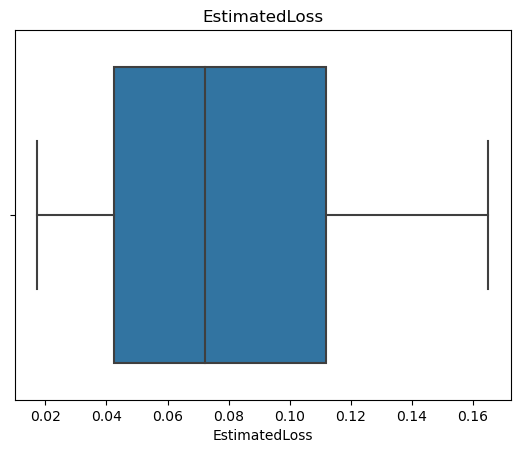

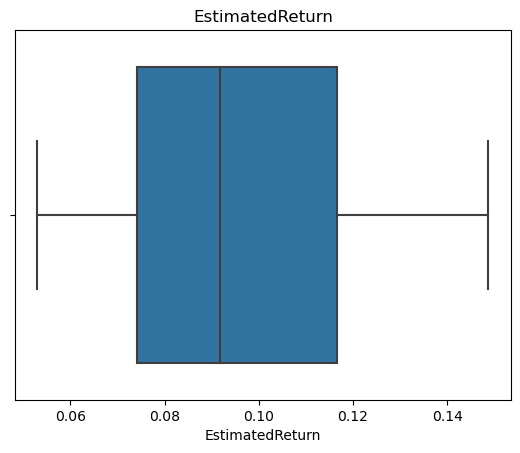

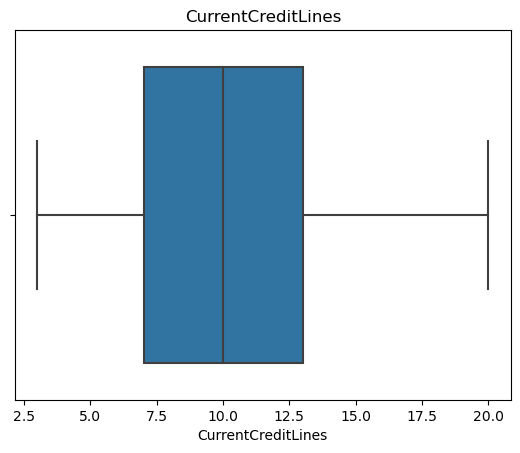

In [26]:
# import pandas as pd
from scipy.stats import mstats

df_cleaned = df1.copy()

# Winsorize the numerical columns
df_cleaned[numeric_col] = df_cleaned[numeric_col].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

# # Display a sample after Winsorization
columns = ['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn','CurrentCreditLines']

# Create a boxplot for a sample
for col in columns:
    sns.boxplot(x=df_cleaned[col])
    plt.title(col)
    plt.show()

In [27]:

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  int64  
 5   ClosedDate                          84853 non-null  object 
 6   BorrowerAPR                         84853 non-null  float64
 7   BorrowerRate                        84853 non-null  float64
 8   LenderYield                         84853 non-null  float64
 9   EstimatedEffectiveYield             84853 non-null  float64
 10  EstimatedLoss                       84853 non-null  float64
 11  EstimatedReturn                     8485

In [28]:
df_cleaned['DebtToIncomeRatio'].fillna(df_cleaned['DebtToIncomeRatio'].median(), inplace=True)
df_cleaned = df_cleaned.drop('ClosedDate', axis=1)
df_cleaned['Occupation'].fillna('Other', inplace=True)
df_cleaned

ListingKey  ListingNumber            ListingCreationDate  \
1       10273602499503308B223C1        1175015  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

        Term  LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
1         36           1      0.12016        0.0920       0.0820   
3         36           1      0.12528        0.0974       0.0874   
4         36           1      0.24614        0.2085       0.1985   
5         60           1      0.15425        0.1314       0.1214   
6         36           1      0.31032        0.2712       0.2612   
...      ...         ...          ...           ...          ...   
113932    36           1      0.22354        0.1864       0.1764   
113933    36           1      0.13220        0.1110       0.1010   
113934    60           1      0.23984        0.2150       0.2050   
113935    60           1      0.28408        0.2605       0.2505   
113936    36           1      0.13189        0.1039       0.0939   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1                       0.07960         0.0249          0.05470   
3                       0.08490         0.0249          0.06000   
4                       0.18316         0.0925          0.09066   
5                       0.11567         0.0449          0.07077   
6                       0.23820         0.1275          0.11070   
...                         ...            ...              ...   
113932                  0.16490         0.0699          0.09500   
113933                  0.10070         0.0200          0.08070   
113934                  0.18828         0.1025          0.08578   
113935                  0.24450         0.0850          0.14870   
113936                  0.09071         0.0299          0.06081   

        ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
1                           6.0                     A           7.0   
3                           6.0                     A           9.0   
4                           3.0                     D           4.0   
5                           5.0                     B          10.0   
6                           2.0                     E           2.0   
...                         ...                   ...           ...   
113932                      4.0                     C           5.0   
113933                      6.0                     A           8.0   
113934                      3.0                     D           3.0   
113935                      4.0                     C           5.0   
113936                      6.0                     A           7.0   

        ListingCategory (numeric) BorrowerState               Occupation  \
1                               2            CO             Professional   
3                              15            GA            Skilled Labor   
4                               2            MN                Executive   
5                               1            NM             Professional   
6                               1            KS           Sales - Retail   
...                           ...           ...                      ...   
113932                          1        

In [29]:
# chek missing value percentage
total_cells = np.product(df_cleaned.shape)
missing_cells = df_cleaned.isnull().sum()
percent = (missing_cells.sum() / total_cells) * 100
percent

0.0

## Exploratory Data Analysis (seperate)

In [30]:
# make a new Data Frame to check the LoanStatus berfore 2009
df_test = data[['LoanStatus','ListingCreationDate',
              'LoanCurrentDaysDelinquent','CreditGrade',
              'MonthlyLoanPayment']]
df_test

LoanStatus            ListingCreationDate  \
0                    Completed  2007-08-26 19:09:29.263000000   
1                      Current  2014-02-27 08:28:07.900000000   
2                    Completed  2007-01-05 15:00:47.090000000   
3                      Current  2012-10-22 11:02:35.010000000   
4                      Current  2013-09-14 18:38:39.097000000   
...                        ...                            ...   
113932                 Current  2013-04-14 05:55:02.663000000   
113933  FinalPaymentInProgress  2011-11-03 20:42:55.333000000   
113934                 Current  2013-12-13 05:49:12.703000000   
113935               Completed  2011-11-14 13:18:26.597000000   
113936                 Current  2014-01-15 09:27:37.657000000   

        LoanCurrentDaysDelinquent CreditGrade  MonthlyLoanPayment  
0                               0           C              330.43  
1                               0         NaN              318.93  
2                               0          HR              123.32  
3                               0         NaN              321.45  
4                               0         NaN              563.97  
...                           ...         ...                 ...  
113932                          0         NaN              364.74  
113933                          0         NaN               65.57  
113934                          0         NaN              273.35  
113935                          0         NaN              449.55  
113936                          0         NaN               64.90  

[113937 rows x 5 columns]

In [31]:
# keep only year from date
df_test['ListingCreationYear'] = pd.to_datetime(df_test['ListingCreationDate']).dt.year

# Drop the date column
df_test.drop(['ListingCreationDate'], axis=1, inplace=True)

df_test

C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_1548\4079984734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ListingCreationYear'] = pd.to_datetime(df_test['ListingCreationDate']).dt.year
C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_1548\4079984734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['ListingCreationDate'], axis=1, inplace=True)


LoanStatus  LoanCurrentDaysDelinquent CreditGrade  \
0                    Completed                          0           C   
1                      Current                          0         NaN   
2                    Completed                          0          HR   
3                      Current                          0         NaN   
4                      Current                          0         NaN   
...                        ...                        ...         ...   
113932                 Current                          0         NaN   
113933  FinalPaymentInProgress                          0         NaN   
113934                 Current                          0         NaN   
113935               Completed                          0         NaN   
113936                 Current                          0         NaN   

        MonthlyLoanPayment  ListingCreationYear  
0                   330.43                 2007  
1                   318.93                 2014  
2                   123.32                 2007  
3                   321.45                 2012  
4                   563.97                 2013  
...                    ...                  ...  
113932              364.74                 2013  
113933               65.57                 2011  
113934              273.35                 2013  
113935              449.55                 2011  
113936               64.90                 2014  

[113937 rows x 5 columns]

In [32]:
# the records in the Data Frame be between 2005 to 2009
df_test.dropna(subset=['CreditGrade'], inplace=True)
df_test

C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_1548\280132251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['CreditGrade'], inplace=True)


LoanStatus  LoanCurrentDaysDelinquent CreditGrade  MonthlyLoanPayment  \
0        Completed                          0           C              330.43   
2        Completed                          0          HR              123.32   
11       Completed                          0           C               33.81   
17      Chargedoff                       2239          AA              334.54   
21       Completed                          0           D              112.64   
...            ...                        ...         ...                 ...   
113921   Completed                          0          AA               29.52   
113922   Completed                          0           C              168.35   
113923   Completed                          0           B              300.95   
113926   Defaulted                        230           E              125.72   
113927   Completed                          0          AA              132.11   

        ListingCreationYear  
0                      2007  
2                      2007  
11                     2007  
17                     2006  
21                     2007  
...                     ...  
113921                 2005  
113922                 2008  
113923                 2008  
113926                 2006  
113927                 2008  

[28953 rows x 5 columns]

###### Q1 What are the most number of borrowers Credit Grade? 

In [33]:
import plotly.express as px 

# Note( listings pre-2009 period )

CreditGrade_counts = df_test['CreditGrade'].value_counts().reset_index()
CreditGrade_counts.columns = ['CreditGrade', 'Count']

# Create the pie chart
fig = px.pie(CreditGrade_counts, values='Count', names='CreditGrade',
             title='Credit Grade Distribution')
# Show the interactive pie chart
fig.show()

###### Q2  does it lead to a higher amount of deliquency?


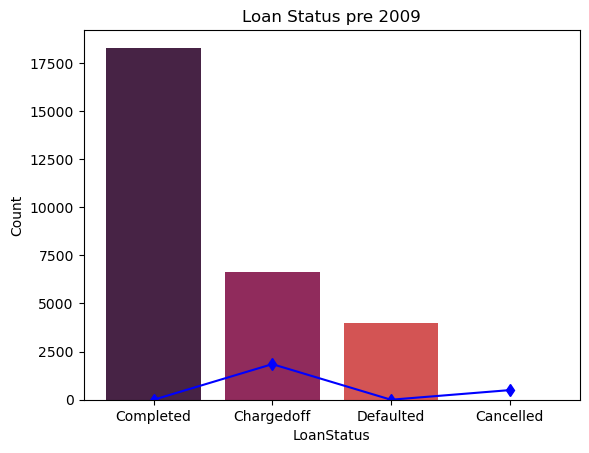

In [34]:
# Q2  does it lead to a higher amount of deliquency?
sns.countplot(data=df_test, x='LoanStatus',palette='rocket')
plt.ylabel('Count')
plt.title('Loan Status pre 2009')

# line chart to assign the mean of delinquncy of each Loan Status value
mean_values = df_test.groupby('LoanStatus')['LoanCurrentDaysDelinquent'].mean()
plt.plot(mean_values.index, mean_values.values, marker='d',c='b')

plt.show()

# so it does't lead to a higher amount of deliquency

######  Q3 What is the highest number of BorrowerRate?

C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_1548\1704695191.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



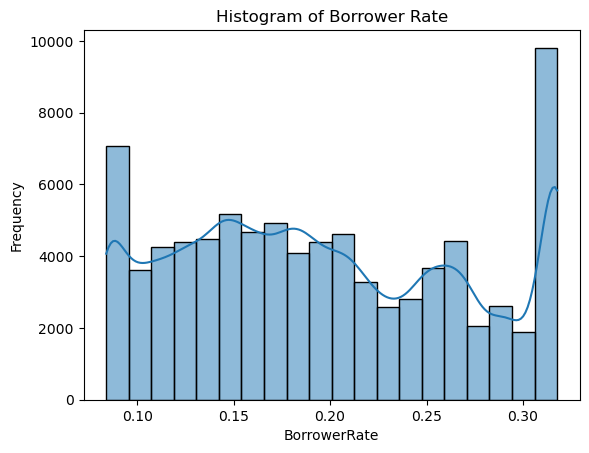

In [35]:
# Q3 What is the highest number of BorrowerRate?

sns.histplot(data=df_cleaned, x='BorrowerRate', kde=True , bins=20, palette='mako')

# Set labels and title
plt.xlabel('BorrowerRate')
plt.ylabel('Frequency')
plt.title('Histogram of Borrower Rate')

# Display the histogram
plt.show()

###### Q4 What is the highest number of LenderYield?


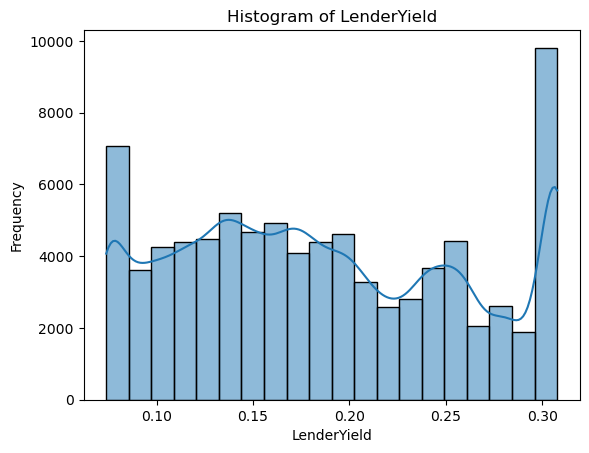

In [36]:
# Q4 What is the highest number of LenderYield?

sns.histplot(data=df_cleaned, x='LenderYield', kde=True , bins=20)

# Set labels and title
plt.xlabel('LenderYield')
plt.ylabel('Frequency')
plt.title('Histogram of LenderYield')

# Display the histogram
plt.show()

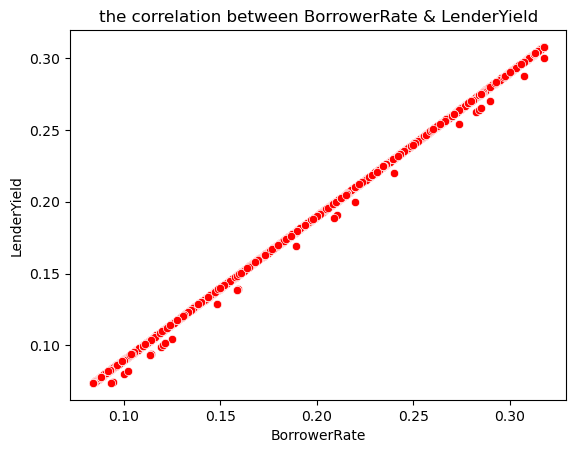

In [37]:
# the corr between BorrowerRate & LenderYield
sns.scatterplot(data=df_cleaned, x='BorrowerRate', y='LenderYield', c='r')
plt.title('the correlation between BorrowerRate & LenderYield')
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')
plt.show()

###### Q5 Does higher Credit Grade leads to higher Monthly Loan Payment ?


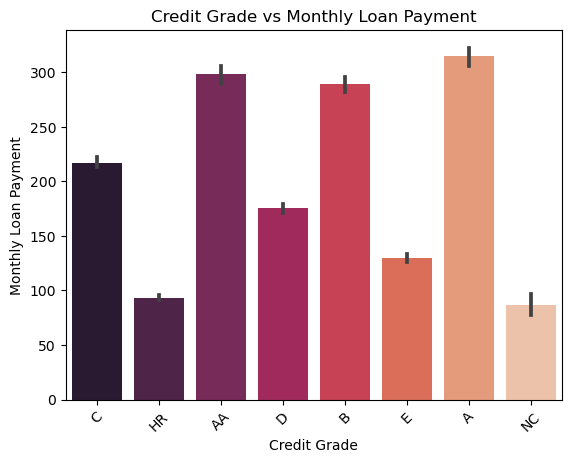

In [38]:
# Q5 Does higher Credit Grade leads to higher Monthly Loan Payment ?

# Create a bar plot
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data=df_test,palette='rocket')

# Set plot title and labels
plt.title('Credit Grade vs Monthly Loan Payment')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payment')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

###### Q6 Relatonship between CreditGrade and LoanStatus


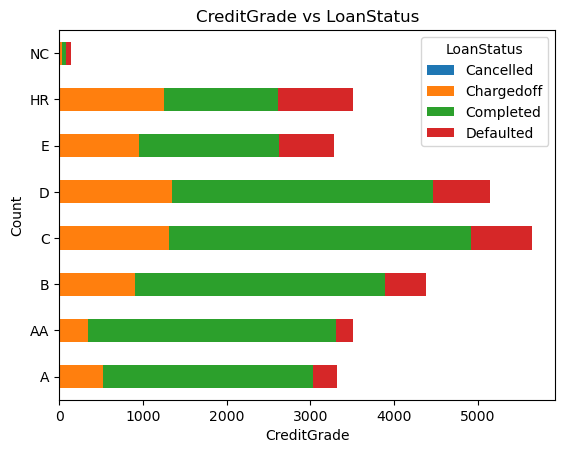

In [39]:
# Q6 Relatonship between CreditGrade and LoanStatus

# Group the data by 'CreditGrade' and 'LoanStatus' and calculate the count
grouped_data = df_test.groupby(['CreditGrade', 'LoanStatus']).size().unstack()

# Plot the stacked bar graph
grouped_data.plot(kind='barh', stacked=True)

# Set the labels and title
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('CreditGrade vs LoanStatus')

# Show the plot
plt.show()

##### Multivariate Relationship between BorrowerRate and BorrowerAPR and  ProperScore


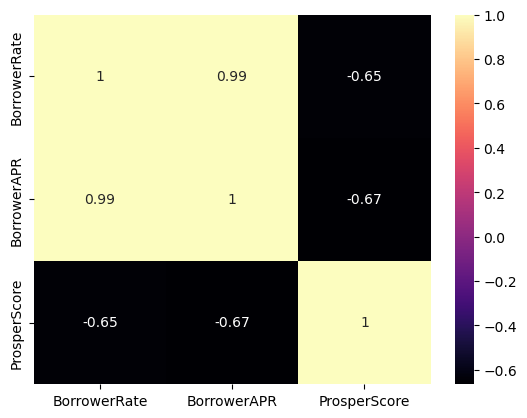

In [40]:
# Multivariate Relationship between BorrowerRate and BorrowerAPR and ProperScore
arr = df_cleaned[['BorrowerRate','BorrowerAPR','ProsperScore']]
corr = arr.corr()

sns.heatmap(corr, annot=True, cmap='magma')
plt.show()


# so there is a strong +ve correlation between 'BorrowerRate','BorrowerAPR' and strong -ve correlation between ProsperScore

## Data Visualization and Manipulation.

In [41]:
# which states have most Borrowers requests ?

# Define a custom color palette
colors = px.colors.qualitative.Set3

# Calculate the count of borrowers by state
state_counts = df_cleaned['BorrowerState'].value_counts().reset_index()
state_counts.columns = ['BorrowerState', 'Count']

# Create the treemap with custom colors
fig = px.treemap(state_counts, path=['BorrowerState'], values='Count',
                 color='Count', color_continuous_scale=colors)

# Show the interactive treemap
fig.show()

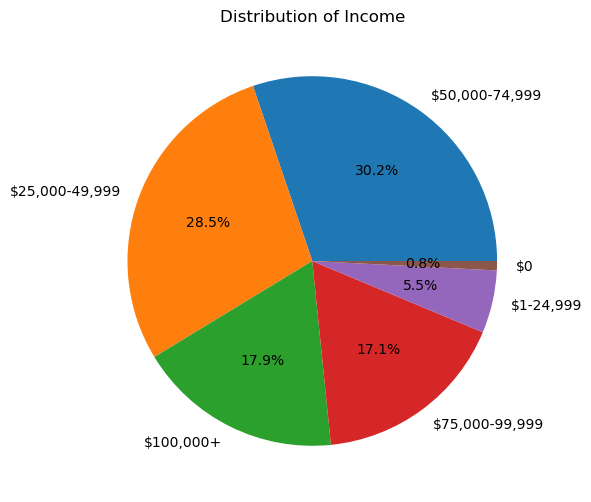

In [42]:
# Income range graph

income_counts = df_cleaned['IncomeRange'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Income')

# Display the chart
plt.show()

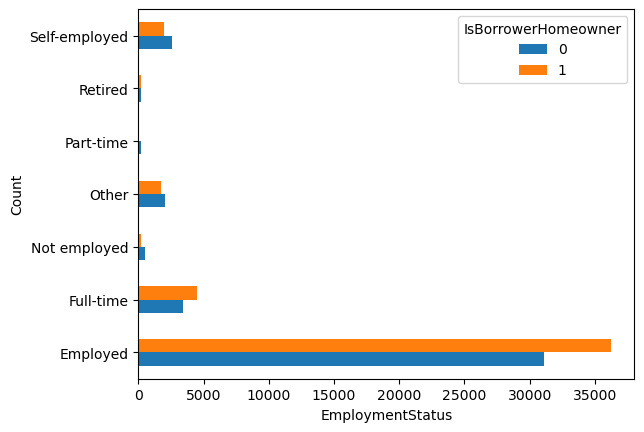

In [43]:
# Plot a grouped bar plot between EmploymentStatus and IsBorrowerHomeowner columns
cross_tab = pd.crosstab(df_cleaned['EmploymentStatus'], df_cleaned['IsBorrowerHomeowner'])
cross_tab.plot(kind='barh',)
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.legend(title='IsBorrowerHomeowner')
plt.show()

##  Multivariate graphs

In [44]:
# Select numerical columns
numeric_col = df_cleaned.select_dtypes(include='number').columns
selected_features = df_cleaned[numeric_col].columns[:20].tolist()

selected_features.append('LoanAccepted')
selected_features

['ListingNumber',
 'Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'LoanAccepted']

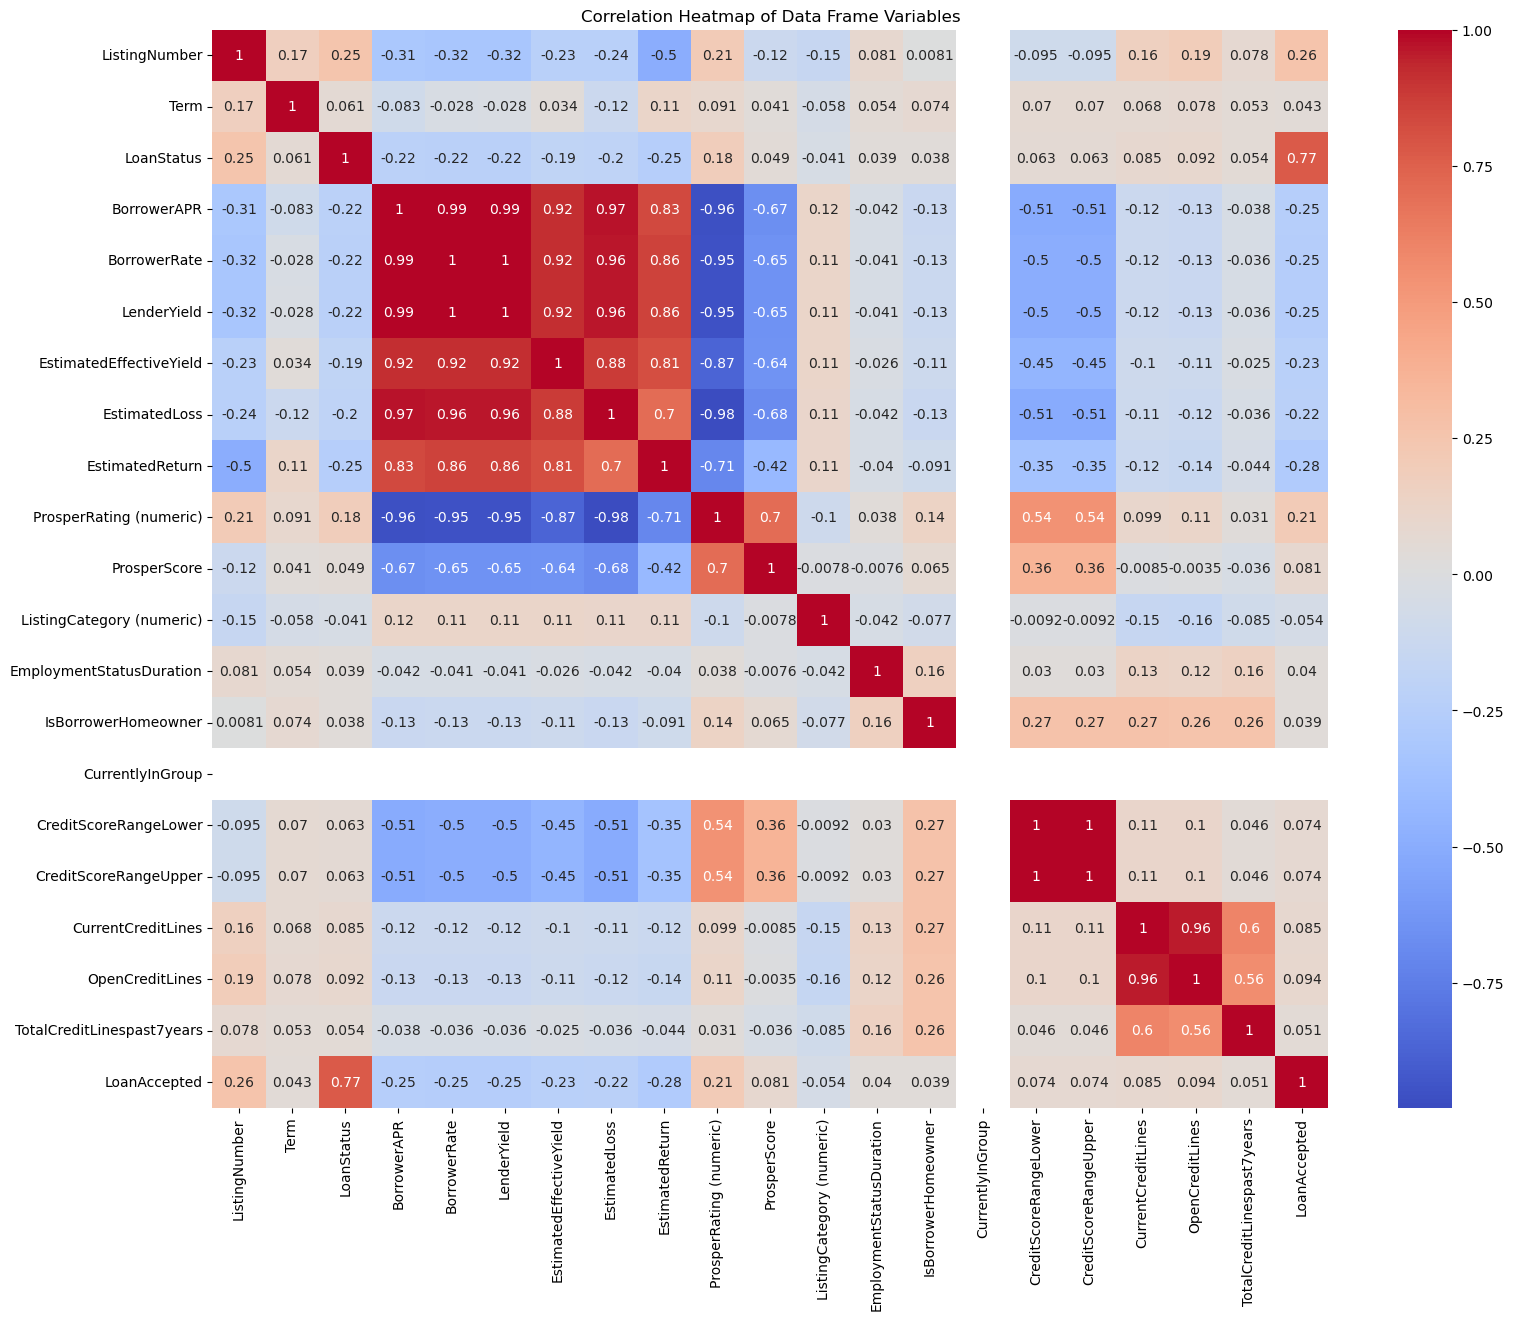

In [45]:
# Create a correlation matrix
corr_matrix = df_cleaned[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap of Data Frame Variables')
# plt.tight_layout()

# Display the heatmap
plt.show()

## Label Encoding

In [46]:
df_cleaned= df1

In [47]:
# Remove unnecessary columns
df_cleaned = df_cleaned.drop(['MemberKey','ListingKey','LoanKey'], axis=1)

In [48]:
# selection the categorical columns

categorical_col = df_cleaned.select_dtypes(exclude='number').columns
categorical_col

Index(['ListingCreationDate', 'ClosedDate', 'ProsperRating (Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'EncodedLoanStatus'],
      dtype='object')

In [49]:
for val in categorical_col:
    print(f'this {val} has unique values are: {df_cleaned[val].unique()}')

this ListingCreationDate has unique values are: ['2014-02-27 08:28:07.900000000' '2012-10-22 11:02:35.010000000'
 '2013-09-14 18:38:39.097000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
this ClosedDate has unique values are: [0 '2012-12-19 00:00:00' '2013-12-26 00:00:00' ... '2011-07-10 00:00:00'
 '2010-12-18 00:00:00' '2009-12-08 00:00:00']
this ProsperRating (Alpha) has unique values are: ['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
this BorrowerState has unique values are: ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'MI' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'UT'
 'DC' 'MA' 'MO' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'HI' 'NH'
 'NE' 'WY' 'AK' 'MT' 'VT' 'SD']
this Occupation has unique values are: ['Professional' 'Skilled Labor' 'Executive' 'Sales - Retail' 'Laborer'
 'Food Service' 'Fireman' 'Construction' 'Computer Programmer' 'Other'
 'Sales - Commission' 'Retail Management' 'E

In [50]:
# Aggregate the date columns
Date_cols=['ListingCreationDate','DateCreditPulled',
           'FirstRecordedCreditLine','LoanOriginationDate']

# Aggregate the boolean columns
bool_cols=['IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']

In [51]:
# refresh the column name and add keep month , year

for col in Date_cols:
    df_cleaned[col + 'Month'] = pd.to_datetime(df_cleaned[col]).dt.month
    df_cleaned[col + 'Year'] = pd.to_datetime(df_cleaned[col]).dt.year
    
# drop the date columns
df_cleaned = df_cleaned.drop(['ListingCreationDate','DateCreditPulled',
                              'FirstRecordedCreditLine','LoanOriginationDate'], axis=1)

In [52]:
df_cleaned.shape

(84853, 73)

In [53]:
df_cleaned.iloc[:,-9:]

EncodedLoanStatus  ListingCreationDateMonth  ListingCreationDateYear  \
1         Non-Delinquent                         2                     2014   
3         Non-Delinquent                        10                     2012   
4         Non-Delinquent                         9                     2013   
5         Non-Delinquent                        12                     2013   
6         Non-Delinquent                         4                     2013   
...                  ...                       ...                      ...   
113932    Non-Delinquent                         4                     2013   
113933    Non-Delinquent                        11                     2011   
113934    Non-Delinquent                        12                     2013   
113935    Non-Delinquent                        11                     2011   
113936    Non-Delinquent                         1                     2014   

        DateCreditPulledMonth  DateCreditPulledYear  \
1                           2                  2014   
3                          10                  2012   
4                           9                  2013   
5                          12                  2013   
6                           4                  2013   
...                       ...                   ...   
113932                      4                  2013   
113933                     11                  2011   
113934                     12                  2013   
113935                     11                  2011   
113936                      1                  2014   

        FirstRecordedCreditLineMonth  FirstRecordedCreditLineYear  \
1                                  3                         1996   
3                                  2                         1983   
4                                  2                         2004   
5                                  3                         1973   
6                                  9                         2000   
...                              ...                          ...   
113932                             9                         1997   
113933                             1                         1992   
113934                             2                         2002   
113935                            12                         1993   
113936                             1                         1995   

        LoanOriginationDateMonth  LoanOriginationDateYear  
1                              3                     2014  
3                             11                     2012  
4                              9                     2013  
5                             12                     2013  
6                              4                     2013  
...                          ...                      ...  
113932                         4                     2013  
113933                        11                     2011  
113934                        12                     2013  
113935                        11                     2011  
113936                         1                     2014  

[84853 rows x 9 columns]

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 73 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   LoanStatus                          84853 non-null  int64  
 3   ClosedDate                          84853 non-null  object 
 4   BorrowerAPR                         84853 non-null  float64
 5   BorrowerRate                        84853 non-null  float64
 6   LenderYield                         84853 non-null  float64
 7   EstimatedEffectiveYield             84853 non-null  float64
 8   EstimatedLoss                       84853 non-null  float64
 9   EstimatedReturn                     84853 non-null  float64
 10  ProsperRating (numeric)             84853 non-null  float64
 11  ProsperRating (Alpha)               8485

In [55]:
df_cleaned['LoanAccepted'].value_counts()

1    76240
0     8613
Name: LoanAccepted, dtype: int64

In [56]:
# label encoding to the boolean columns

from sklearn.preprocessing import LabelEncoder
enco = LabelEncoder()

for cols in bool_cols:
    df_cleaned[cols] = enco.fit_transform(df_cleaned[cols])
    
df_cleaned[bool_cols]    

IsBorrowerHomeowner  CurrentlyInGroup  IncomeVerifiable
1                         0                 0                 1
3                         1                 0                 1
4                         1                 0                 1
5                         1                 0                 1
6                         0                 0                 1
...                     ...               ...               ...
113932                    1                 0                 1
113933                    1                 0                 1
113934                    1                 0                 1
113935                    1                 0                 1
113936                    0                 0                 1

[84853 rows x 3 columns]

## Feature Engineering

In [57]:
# Perform one-hot encoding on the LoanStatus column
loan_status_encoded = pd.get_dummies(df_cleaned['LoanStatus'], prefix='LoanStatus')

# Concatenate the encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned, loan_status_encoded], axis=1)

# Drop the original LoanStatus column
df_cleaned.drop('LoanStatus', axis=1, inplace=True)

In [58]:
# ProsperRating (Alpha): Convert to numerical values using label encoding
label_encoder = LabelEncoder()

df_cleaned['ProsperRating (Alpha)'] = label_encoder.fit_transform(df_cleaned['ProsperRating (Alpha)'])

In [59]:
# Apply label encoder on the BorrowerState

label_encoder = LabelEncoder()

# Perform label encoding on the BorrowerState column
df_cleaned['BorrowerState'] = label_encoder.fit_transform(df_cleaned['BorrowerState'])

# Display the updated DataFrame
df_cleaned['BorrowerState'].head()

1     5
3    10
4    21
5    29
6    15
Name: BorrowerState, dtype: int32

In [60]:
# # Perform label encoding on the Occupation column
# df_cleaned['Occupation_encoded'] = label_encoder.fit_transform(df_cleaned['Occupation'])

df_cleaned = df_cleaned.drop(['Occupation'] , axis = 1)

In [61]:
# check the remaining categorical columns
categorical_col = df_cleaned.select_dtypes(exclude='number').columns

for val in categorical_col:
    print(f'Coulmn {val} has values : {df_cleaned[val].unique()}')

Coulmn ClosedDate has values : [0 '2012-12-19 00:00:00' '2013-12-26 00:00:00' ... '2011-07-10 00:00:00'
 '2010-12-18 00:00:00' '2009-12-08 00:00:00']
Coulmn EmploymentStatus has values : ['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']
Coulmn IncomeRange has values : ['$50,000-74,999' '$25,000-49,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' '$0']
Coulmn LoanOriginationQuarter has values : ['Q1 2014' 'Q4 2012' 'Q3 2013' 'Q4 2013' 'Q2 2013' 'Q2 2012' 'Q1 2013'
 'Q2 2010' 'Q1 2012' 'Q3 2012' 'Q4 2010' 'Q4 2011' 'Q2 2011' 'Q1 2011'
 'Q3 2009' 'Q3 2011' 'Q1 2010' 'Q4 2009' 'Q3 2010']
Coulmn EncodedLoanStatus has values : ['Non-Delinquent' 'Delinquent']


In [62]:
# EmploymentStatus: Apply one-hot encoding

encoded_employment = pd.get_dummies(df_cleaned['EmploymentStatus'], prefix='Employment')
df_cleaned = pd.concat([df_cleaned, encoded_employment], axis=1).drop(['EmploymentStatus'], axis=1)

In [63]:
# IncomeRange: Convert to numerical values using one hot encoding
encoded_income = pd.get_dummies(df_cleaned['IncomeRange'], prefix='income')
df_cleaned = pd.concat([df_cleaned, encoded_income], axis=1).drop(['IncomeRange'], axis=1)

In [64]:
# LoanOriginationQuarter: Apply label encoder

df_cleaned['LoanOriginationQuarter'] = label_encoder.fit_transform(df_cleaned['LoanOriginationQuarter'])

In [65]:
# shape the data frame after the encoding
df_cleaned.shape

(84853, 84)

In [66]:
# check if there categorical features in the Data Frame
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    print("Categorical columns exist in the DataFrame.")
else:
    print("No categorical columns found in the DataFrame.")

Categorical columns exist in the DataFrame.


In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   ClosedDate                          84853 non-null  object 
 3   BorrowerAPR                         84853 non-null  float64
 4   BorrowerRate                        84853 non-null  float64
 5   LenderYield                         84853 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null  float64
 7   EstimatedLoss                       84853 non-null  float64
 8   EstimatedReturn                     84853 non-null  float64
 9   ProsperRating (numeric)             84853 non-null  float64
 10  ProsperRating (Alpha)               84853 non-null  int32  
 11  ProsperScore                        8485

In [68]:
# change the data type uint8 to int
uint8_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'uint8']
len(uint8_columns)

df_cleaned[uint8_columns] = df_cleaned[uint8_columns].astype(int)

In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   ClosedDate                          84853 non-null  object 
 3   BorrowerAPR                         84853 non-null  float64
 4   BorrowerRate                        84853 non-null  float64
 5   LenderYield                         84853 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null  float64
 7   EstimatedLoss                       84853 non-null  float64
 8   EstimatedReturn                     84853 non-null  float64
 9   ProsperRating (numeric)             84853 non-null  float64
 10  ProsperRating (Alpha)               84853 non-null  int32  
 11  ProsperScore                        8485

## Loan Status

In [70]:
from sklearn.model_selection import train_test_split

# Select the columns you want to keep
columns_to_keep = ['LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss','BorrowerAPR','BorrowerRate','EstimatedReturn'
                      ,'LP_CustomerPrincipalPayments','EstimatedLoss']

# Split the data into X and y
y = df_cleaned['LoanAccepted']
X = df_cleaned[columns_to_keep]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67882, 8), (16971, 8), (67882,), (16971,))

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9972894938424371

In [73]:
Acc = accuracy_score(y_pred, y_test)
print('.:. Logistic Regression Model Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. Logistic Regression Model Accuracy: 99.73% .:.


### Confusion_matrix

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1664    46]
 [    0 15261]]


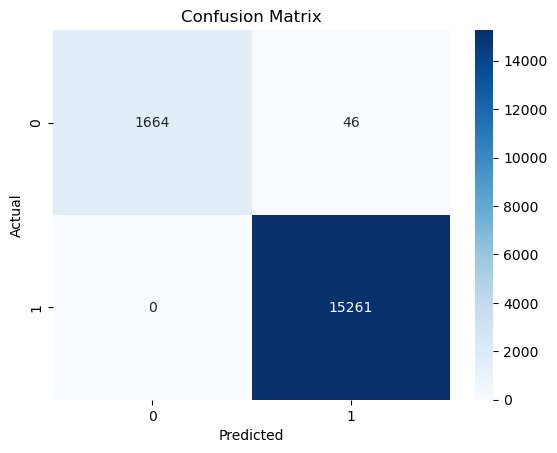

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Classification_report

In [76]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1710
           1       1.00      1.00      1.00     15261

    accuracy                           1.00     16971
   macro avg       1.00      0.99      0.99     16971
weighted avg       1.00      1.00      1.00     16971



## ROI 

In [77]:
# Calculate ROI
total_payments = df_cleaned['MonthlyLoanPayment'] * df_cleaned['LoanMonthsSinceOrigination']
total_investment = df_cleaned['LoanOriginalAmount']
roi = (total_payments - total_investment) / total_investment

df_cleaned['ROI'] = np.round(roi * 100, 2) # multiply by 100 and round to 2 decimal places

In [78]:
df_cleaned['ROI'].head(10)

1    -100.00
3     -48.57
4     -77.44
5     -93.15
6     -55.02
7     -62.74
8     -90.83
9     -90.83
10    -35.57
12    -93.13
Name: ROI, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

y_roi = df_cleaned['ROI']
X_roi = df_cleaned.drop(['ROI'] , axis=1)

#split the data into training and testing
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_roi, y_roi, test_size=0.2, random_state=0)

In [80]:
# Select the columns you want to keep
columns_to_keep = ['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedReturn','LenderYield','BorrowerRate','EstimatedLoss','LoanMonthsSinceOrigination','LoanMonthsSinceOrigination'
                      ,'MonthlyLoanPayment','LoanNumber','LoanOriginationQuarter']


# Split the data into X and y
y_roi = df_cleaned['ROI']
X_roi = df_cleaned[columns_to_keep]

In [81]:
# training and testing variable
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_roi, y_roi, test_size=0.2, random_state=50)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create a Linear Regression model
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(X_trainr, y_trainr)

# Calculate the accuracy score on the testing data
accuracy = reg_model.score(X_testr, y_testr)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.8942907703069707


In [83]:
print('Linear Regression Model Accuracy:'+'\033[1m {:.2f}%'.format(accuracy*100))

Linear Regression Model Accuracy: 89.43%


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Create a Random Forest Regressor model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_trainr, y_trainr)

# Calculate the accuracy score on the testing data
accuracy = rf_model.score(X_testr, y_testr)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.9949070107008228


In [85]:
print('.:. Random Forest Regressor Model Accuracy:'+'\033[1m {:.2f}%'.format(accuracy*100))

.:. Random Forest Regressor Model Accuracy: 99.49%


## EMI

In [86]:
import math

def calculate_emi(principal, interest_rate, tenure):
    """
    Calculates the EMI (Equated Monthly Installment) for a loan based on the principal amount,
    interest rate, and loan tenure.

    Args:
    principal (float): The principal amount of the loan.
    interest_rate (float): The interest rate at which the loan is borrowed.
    tenure (int): The loan tenure (in months).

    Returns:
    float: The calculated EMI for the loan.
    """
    # Convert interest rate from annual to monthly and calculate the monthly interest rate
    monthly_interest_rate = (interest_rate / 12) / 100

    # Calculate the denominator of the EMI formula
    denominator = (1 + monthly_interest_rate) ** tenure - 1

    # Check if the denominator is very small and adjust it if necessary to avoid division by zero
    epsilon = 0.0001
    if abs(denominator) < epsilon:
        denominator = epsilon

    # Calculate the EMI
    emi = principal * monthly_interest_rate * (1 + monthly_interest_rate) ** tenure / denominator

    return emi

In [87]:
df_cleaned['EMI'] = df_cleaned.apply(lambda row: calculate_emi(row['LP_CustomerPrincipalPayments'], row['BorrowerRate'], row['Term']), axis=1)
df_cleaned['EMI']

1           0.000000
3         113.812112
4          43.562496
5           5.884441
6          16.854992
             ...    
113932     62.356061
113933     55.571652
113934      3.069210
113935    251.658793
113936      1.314603
Name: EMI, Length: 84853, dtype: float64

## Pipelining

In [88]:
# Respective dataframe
df_cleaned

ListingNumber  Term           ClosedDate  BorrowerAPR  BorrowerRate  \
1             1209647    36                    0      0.12016        0.0920   
3              658116    36                    0      0.12528        0.0974   
4              909464    36                    0      0.24614        0.2085   
5             1074836    60                    0      0.15425        0.1314   
6              750899    36                    0      0.31032        0.2712   
...               ...   ...                  ...          ...           ...   
113932         753087    36                    0      0.22354        0.1864   
113933         537216    36                    0      0.13220        0.1110   
113934        1069178    60                    0      0.23984        0.2150   
113935         539056    60  2013-08-13 00:00:00      0.28408        0.2605   
113936        1140093    36                    0      0.13189        0.1039   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1            0.0820                  0.07960         0.0249          0.05470   
3            0.0874                  0.08490         0.0249          0.06000   
4            0.1985                  0.18316         0.0925          0.09066   
5            0.1214                  0.11567         0.0449          0.07077   
6            0.2612                  0.23820         0.1275          0.11070   
...             ...                      ...            ...              ...   
113932       0.1764                  0.16490         0.0699          0.09500   
113933       0.1010                  0.10070         0.0200          0.08070   
113934       0.2050                  0.18828         0.1025          0.08578   
113935       0.2505                  0.24450         0.0850          0.15950   
113936       0.0939                  0.09071         0.0299          0.06081   

        ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
1                           6.0                      0           7.0   
3                           6.0                      0           9.0   
4                           3.0                      4           4.0   
5                           5.0                      2          10.0   
6                           2.0                      5           2.0   
...                         ...                    ...           ...   
113932                      4.0                      3           5.0   
113933                      6.0                      0           8.0   
113934                      3.0                      4           3.0   
113935                      4.0                      3           5.0   
113936                      6.0                      0           7.0   

        ListingCategory (numeric)  BorrowerState  EmploymentStatusDuration  \
1                               2              5                      44.0   
3                              16             10                     113.0   
4                               2             21                      44.0   
5                               1             29                      82.0   
6                               1             15                     172.0   
...                           ...            ...                       ...   
113932                          1             13                     246.0   
113933                          7             35                      21.0   
113934                          1             40                      84.0   
113935                          2             10                      94.0   
113936                          1             31                     244.0   

        IsBorrowerHomeowner  CurrentlyInGroup  CreditScoreRangeLower  \
1                         0                 0                  680.0   
3                         1                 0                  800.0   
4                         1                 0                  680.0   
5       

In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 86 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   ClosedDate                          84853 non-null  object 
 3   BorrowerAPR                         84853 non-null  float64
 4   BorrowerRate                        84853 non-null  float64
 5   LenderYield                         84853 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null  float64
 7   EstimatedLoss                       84853 non-null  float64
 8   EstimatedReturn                     84853 non-null  float64
 9   ProsperRating (numeric)             84853 non-null  float64
 10  ProsperRating (Alpha)               84853 non-null  int32  
 11  ProsperScore                        8485

In [90]:
df_cleaned = df_cleaned.drop(['DebtToIncomeRatio','EmploymentStatusDuration', 'ClosedDate','EncodedLoanStatus'], axis=1)

In [91]:
X = df_cleaned.copy()
y = df_cleaned['LoanAccepted']

### Loan Status First Target

In [92]:
# from eli5.sklearn import PermutationImportance

# Build the pipeline
pipeline_LoanStatus = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', LogisticRegression()),  # Apply logistic regression
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Fit the pipeline to the training data
pipeline_LoanStatus.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline_LoanStatus.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('.:. Logistic Regression Model Accuracy after pipeline :'+'\033[1m {:.2f}%'.format(accuracy*100)+' .:.')

Accuracy: 1.0
.:. Logistic Regression Model Accuracy after pipeline : 100.00% .:.


### ROI second target

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select the columns you want to keep
columns_to_keep = ['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedReturn','LenderYield','BorrowerRate','EstimatedLoss','LoanMonthsSinceOrigination','LoanMonthsSinceOrigination', 'MonthlyLoanPayment', 'LoanNumber', 'LoanOriginationQuarter']

# Split the data into X and y
y_roi = df_cleaned['ROI']
X_roi = df_cleaned[columns_to_keep]

# Build the pipeline
pipeline_ROI = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('regressor', LinearRegression()),  # Apply linear regression
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_roi, y_roi, test_size=0.2, random_state=0)

# Fit the pipeline to the training data
pipeline_ROI.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline_ROI.predict(X_test)

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = pipeline_ROI.score(X_test, y_test)
print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Accuracy: {accuracy:.3f}")

print('.:. Linear Regression Model Accuracy after pipeline :'+'\033[1m {:.2f}%'.format(accuracy*100)+' .:.')

R-squared: 0.907
Mean Squared Error: 306.927
Accuracy: 0.907
.:. Linear Regression Model Accuracy after pipeline : 90.67% .:.


### EMI Third target

In [94]:
# Select the columns you want to keep
columns_to_keep = ['LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 'LP_ServiceFees', 'MonthlyLoanPayment', 'ROI', 'BorrowerAPR', 'LP_InterestandFees', 'EstimatedEffectiveYield', 'LenderYield', 'BorrowerRate']

# Split the data into X and y
y_emi = df_cleaned['EMI']
X_emi = df_cleaned[columns_to_keep]

# Build the pipeline
pipeline_EMI = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('regressor', LinearRegression()),  # Apply linear regression
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_emi, y_emi, test_size=0.2, random_state=0)

# Fit the pipeline to the training data
pipeline_EMI.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline_EMI.predict(X_test)

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Calculate the accuracy score on the testing data
accuracy = pipeline_EMI.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

R-squared: 0.856
Mean Squared Error: 1713.590
Accuracy: 0.856


# Deployment

In [95]:
import pickle
filename= 'model_logistic.pickle'
pickle.dump(pipeline_LoanStatus, open(filename, 'wb'))

# # import joblib
pickle.dump(pipeline_ROI, open('model_linear1.pickle','wb'))

# # import joblib
pickle.dump(pipeline_EMI, open('model_linear2.pickle','wb'))

In [97]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Set page title
st.set_page_config(page_title="Online P2P lending markets App")
st.title("Welcome to our Online P2P lending markets App")

# create a checkbox to toggle between loan and ROI predictions
predict_roi_checkbox = st.checkbox("ROI Predictions", value=False)

# loading the saved models
loaded_model=pickle.load(open('model_logistic.pickle','rb'))

loaded_model_ROI=pickle.load(open('model_linear1.pickle','rb'))

loaded_model_EMI=pickle.load(open('model_linear2.pickle','rb'))

# creating a function for loan status prediction
def Loanstatus_prediction(input_data):
    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = loaded_model.predict(input_data_reshaped)
    if (prediction[0] == 0):
        return 'Loan Rejected'
    else:
        return 'Loan Accepted'


# Define the ROIprediction function
def ROIprediction(input_data):
    # Convert input data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Make predictions using the loaded model
    roi_emi_prediction = loaded_model_ROI.predict(input_data_reshaped)

    # Check that the roi_emi_prediction array has two elements
    if roi_emi_prediction.shape == (1, 2):
        roi_emi_prediction = roi_emi_prediction.reshape(2,)

    # Separate the ROI and EMI predictions
    roi_prediction, emi_prediction = roi_emi_prediction[0], roi_emi_prediction[1]

    # Return the predicted ROI and EMI values
    return roi_prediction, emi_prediction

if predict_roi_checkbox:
    # display the user inputs for ROI predictions
    st.header('ROI and EMI Predictions')

    # getting the input data from the user
    LP_ServiceFees = st.text_input('LP_ServiceFees')
    LoanOriginalAmount = st.text_input('LoanOriginalAmount')
    MonthlyLoanPayment = st.text_input('MonthlyLoanPayment')
    LP_CustomerPrincipalPayments = st.text_input('LP_CustomerPrincipalPayments')
    BorrowerRate2 = st.text_input('BorrowerRate')
    LP_CustomerPayments = st.text_input('LP_CustomerPayments')
    EstimatedLoss = st.text_input('EstimatedLoss')
    EstimatedEffectiveYield = st.text_input('EstimatedEffectiveYield')
    BorrowerAPR2 = st.text_input('BorrowerAPR')
    EstimatedReturn = st.text_input('EstimatedReturn')
    LenderYield2 = st.text_input('LenderYield')
    LoanMonthsSinceOrigination = st.text_input('LoanMonthsSinceOrigination')
    


    # creating a button for ROI prediction
    if st.button('Predict ROI'):
        roi_pred, emi_pred = ROIprediction(
            [BorrowerAPR2, EstimatedReturn, EstimatedEffectiveYield, MonthlyLoanPayment, LP_CustomerPayments,
             LP_CustomerPrincipalPayments, LoanOriginalAmount, LoanMonthsSinceOrigination, LenderYield2, BorrowerRate2,EstimatedLoss,LP_ServiceFees])

        # display the predicted ROI and EMI values to the user
        st.write(f"Predicted ROI: {roi_pred}")
        st.write(f"Predicted EMI: {emi_pred}")
else:
    # display the user inputs for loan predictions
    st.header('Loan Status Predictions')

    # getting the input data from the user
    LoanCurrentDaysDelinquent = st.text_input('Number of Delinquent days')
    LP_GrossPrincipalLoss = st.text_input('The gross charged off amount of the loan')
    LP_NetPrincipalLoss = st.text_input('The principal that remains uncollected after any recoveries')
    LoanStatus_Chargedoff = st.text_input('if LoanStatus Chargedoff')
    LoanStatus_Current = st.text_input('if it is a current Loan Status')
    BorrowerAPR = st.text_input("The Borrower's Annual Percentage Rate")
    EstimatedReturn = st.text_input('The estimated Return')
    BorrowerRate = st.text_input("The Borrower's interest rate for this loan")
    LenderYield = st.text_input('The Lender yiled on the loan')
    LP_CustomerPrincipalPayments = st.text_input('Pre charge-off cumulative principal ')

    # creating a button for loan status prediction
    if st.button('Predict Loan Status'):
        pred = Loanstatus_prediction([LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanStatus_Chargedoff,LoanStatus_Current,BorrowerAPR,EstimatedReturn,BorrowerRate,LenderYield,LP_CustomerPrincipalPayments])

        # display the prediction to the user using a radio button
        if pred:
            loan_status = st.radio('Loan Status:', ['Loan Rejected', 'Loan Accepted'],
                                   index=1 if pred == 'Loan Accepted' else 0)


2023-07-22 15:23:34.047 
  command:

    streamlit run C:\Users\deepak parajapt\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
